# SC1015 Data Science Project

By V Swaytha and Lim Wei Sheng

FCS4, Group 10

## 1. Introduction

### 1.1 Problem Statement

Gross Domestic Product (GDP) is the total monetary values of all final goods and services produced within a country in a specific time period. 

GDP is affected by many factors such as exports, imports, educational expenditure and many more. Furthermore, with rising geopolitical tensions and trade fragmentation causes economic uncertainty globally. It is crucial we make accurate GDP predictions for policymakers, investors, and businesses in making informed decisions and planning for the future.
Hence, we want to figure out how different variables affect GDP.

In this project, we will be using predictor variables to analyse the relationships between them and GDP. We also aim to develop machine learning models that can accurately make GDP predictions. We will be building three machine learning models, namely Linear Regression, Random Forest, and Long Short-Term Memory Model.

### 1.2 Dataset

Dataset used: https://www.kaggle.com/datasets/yusufglcan/country-data 

The data has been collected from the World Bank and it consists of GDP data along with the following predictors for 163 countries over the past 22 years (2000-2022).

Predictors include:
      
1. Ease of Doing Business                    
2. GDP                                       
3. Inflation Rate                  
4. Research and Development                                   
5. Unemployment                   
6. Population                      
7. Land                             
8. Continent                  
9. Export                         
10. Import                         
11. EducationExpenditure           
12. HealthExpenditure              
13. NetTrade                       
14. GDPPerCapita                   
15. PopulationDensity 
16. Agriculture as a percentage of the GDP  
17. EducationExpenditure as a percentage of the GDP  
18. Export as a percentage of the GDP          
19. HealthExpenditure as a percentage of the GDP    
20. Import as a percentage of the GDP                   
21. Industry as a percentage of the GDP  
22. Service as a percentage of the GDP   

## 2. Data Preparation

In [117]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import pylab as pl
import matplotlib.pyplot as plt 
from datetime import datetime as dt

sb.set()

In [118]:
data = pd.read_csv('countries.csv')

pd.set_option('display.max_columns', None)

data

,CountryName,CountryCode,Year,Agriculture(%GDP),EaseofDoingBusiness,EducationExpenditure(%GDP),Export(%GDP),GDP,HealthExpenditure(%GDP),Import(%GDP),Industry(%GDP),InflationRate,R&D,Service(%GDP),Unemployment,Population,Land,ContinentName,Export,Import,EducationExpenditure,HealthExpenditure,NetTrade,GDPPerCapita,PopulationDensity
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,20.494909,6.124620,NaN,48.302753,8.054,19542982,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,20.494909,6.124620,NaN,48.302753,8.040,19688632,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,23.810127,6.124620,NaN,36.151155,8.186,21000256,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,22.710864,6.124620,NaN,37.444804,8.122,22645130,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,26.226790,6.124620,NaN,41.110895,8.053,23553551,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,Zimbabwe,ZWE,2018,7.319375,50.509980,19.039841,26.163973,3.415607e+10,4.670418,28.386297,31.037898,10.618866,NaN,55.984768,6.784,15052184,390760.0,Africa,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
5102,Zimbabwe,ZWE,2019,9.819262,54.469350,22.837985,27.163459,2.183223e+10,3.659765,25.524111,32.025947,255.304991,NaN,52.677299,7.370,15354608,390760.0,Africa,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
5103,Zimbabwe,ZWE,2020,8.772859,49.833418,15.666611,25.917014,2.150970e+10,3.425581,28.733547,32.767517,557.201817,NaN,52.892574,7.898,15669666,390760.0,Africa,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486
5104,Zimbabwe,ZWE,2021,8.849899,49.833418,22.837985,25.411446,2.837124e+10,6.704907,30.901234,28.805586,98.546105,NaN,56.639870,8.067,15993524,390760.0,Africa,7.209542e+09,8.767063e+09,6.479419e+09,1.902265e+09,-1.557521e+09,1773.920411,40.929276


In [119]:
print(data.isnull().sum())

CountryName                      0
CountryCode                      0
Year                             0
Agriculture(%GDP)              276
EaseofDoingBusiness            598
EducationExpenditure(%GDP)     368
Export(%GDP)                   460
GDP                             69
HealthExpenditure(%GDP)        575
Import(%GDP)                   460
Industry(%GDP)                 253
InflationRate                  552
R&D                           1518
Service(%GDP)                  299
Unemployment                   667
Population                       0
Land                             0
ContinentName                    0
Export                         460
Import                         460
EducationExpenditure           414
HealthExpenditure              575
NetTrade                       460
GDPPerCapita                    69
PopulationDensity                0
dtype: int64


Variables which are a percentage of the GDP (i.e. Service (%GDP)) are not relevant to our question as we are focusing on GDP itself, not the components which make up GDP.
Hence, we will be dropping all the variables which are represented as a percentage of the GDP.


Furthermore, there are many null values in our dataset.
We have decided to drop them entirely instead of replacing them with the mean/median of the variable it belongs to as we believe it will hinder the accuracy of our dataset.


We have also dropped the variable R&D (Research and Development) entirely as it contains too many null values (30% of its data is empty).


In [120]:
data = pd.read_csv('countries.csv')

#Remove certain variables as it is not relavent to our question
data = data.drop(columns=['ContinentName', 'CountryCode', 'Agriculture(%GDP)', 'EducationExpenditure(%GDP)', 'Export(%GDP)', 'HealthExpenditure(%GDP)', 'Import(%GDP)', 'Industry(%GDP)', 'R&D', 'Service(%GDP)'])

#Remove countries with NaN values
data = data.dropna()
data

,CountryName,Year,EaseofDoingBusiness,GDP,InflationRate,Unemployment,Population,Land,Export,Import,EducationExpenditure,HealthExpenditure,NetTrade,GDPPerCapita,PopulationDensity
23,Albania,2000,64.763660,3.480355e+09,0.050018,19.028,3089027,28750.0,7.000834e+08,1.508344e+09,3.528046e+08,2.068788e+08,-8.082604e+08,1126.683340,107.444417
24,Albania,2001,64.763660,3.922101e+09,3.107588,18.575,3060173,28750.0,8.367179e+08,1.771127e+09,4.150340e+08,2.324171e+08,-9.344092e+08,1281.659826,106.440800
25,Albania,2002,64.763660,4.348068e+09,7.770526,17.895,3051010,28750.0,9.107297e+08,2.068787e+09,4.298900e+08,2.463007e+08,-1.158057e+09,1425.124219,106.122087
26,Albania,2003,64.763660,5.611496e+09,0.484003,16.989,3039616,28750.0,1.169850e+09,2.591006e+09,5.933372e+08,3.478521e+08,-1.421156e+09,1846.120121,105.725774
27,Albania,2004,64.763660,7.184686e+09,2.280019,16.310,3026939,28750.0,1.596262e+09,3.220868e+09,7.689884e+08,4.350887e+08,-1.624606e+09,2373.581292,105.284835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,Zimbabwe,2018,50.509980,3.415607e+10,10.618866,6.784,15052184,390760.0,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
5102,Zimbabwe,2019,54.469350,2.183223e+10,255.304991,7.370,15354608,390760.0,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
5103,Zimbabwe,2020,49.833418,2.150970e+10,557.201817,7.898,15669666,390760.0,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486
5104,Zimbabwe,2021,49.833418,2.837124e+10,98.546105,8.067,15993524,390760.0,7.209542e+09,8.767063e+09,6.479419e+09,1.902265e+09,-1.557521e+09,1773.920411,40.929276


In [121]:
print(data.isnull().sum()) #check if we filled all missing values

CountryName             0
Year                    0
EaseofDoingBusiness     0
GDP                     0
InflationRate           0
Unemployment            0
Population              0
Land                    0
Export                  0
Import                  0
EducationExpenditure    0
HealthExpenditure       0
NetTrade                0
GDPPerCapita            0
PopulationDensity       0
dtype: int64


As we can see, there are no null values in our dataset anymore. Now, we can proceed onto our data analysis.

## 3. Exploratory Data Analysis

### 3.1 Visualising the GDP and GDP Per Capita of the Top 10 Countries

C:\Users\Darren\AppData\Local\Temp\ipykernel_27868\322712811.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='CountryName', y='GDP', data=gdps, palette='Set1', ax=ax)


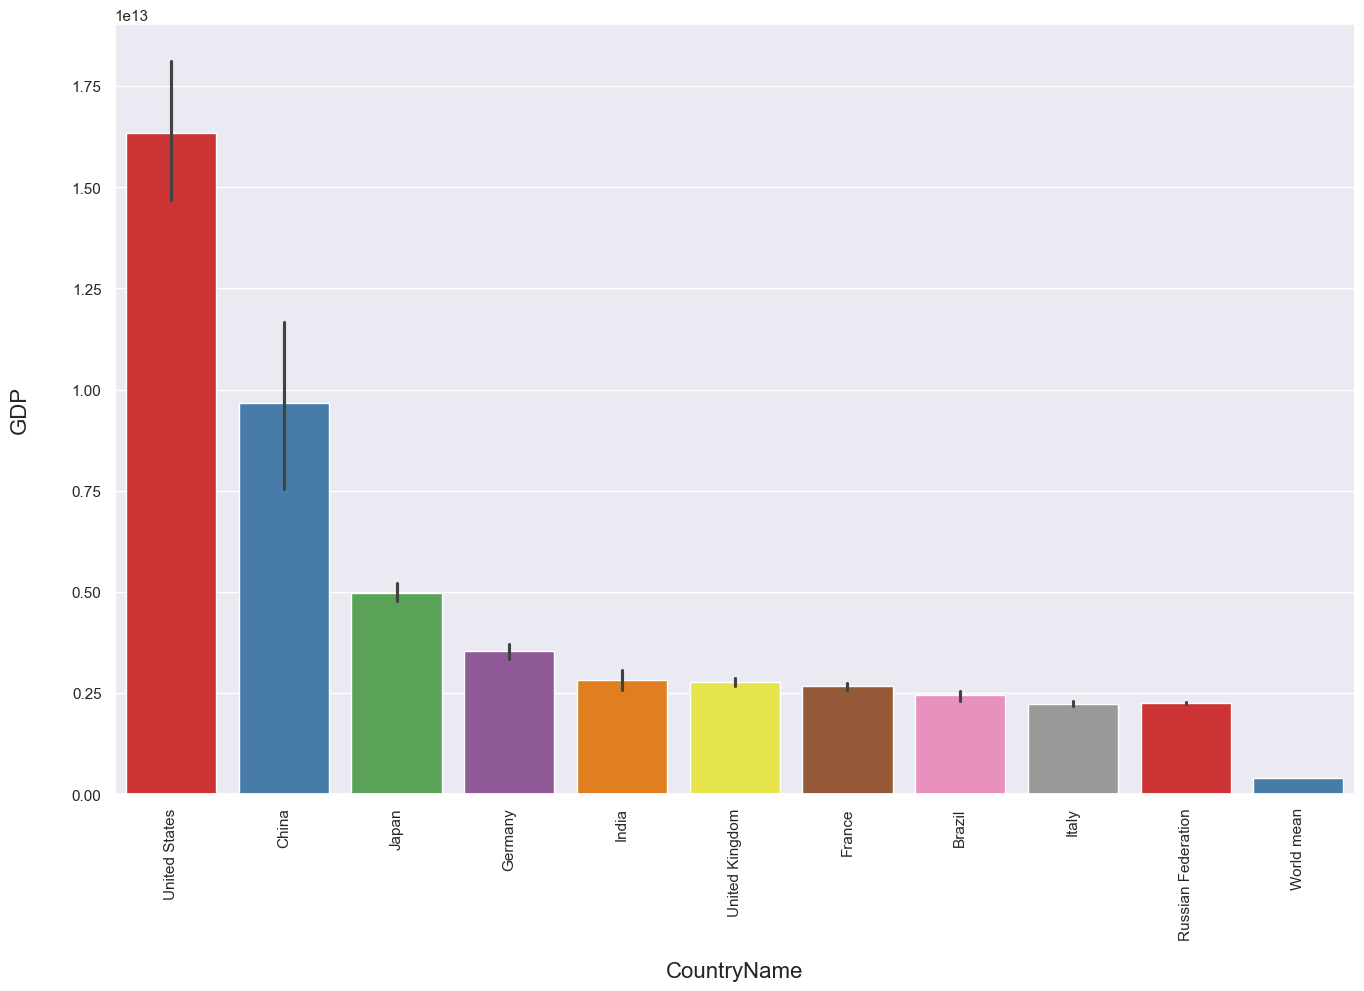

C:\Users\Darren\AppData\Local\Temp\ipykernel_27868\322712811.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='CountryName', y='GDP', data=bottom_gdp_countries, palette='Set1', ax=ax)


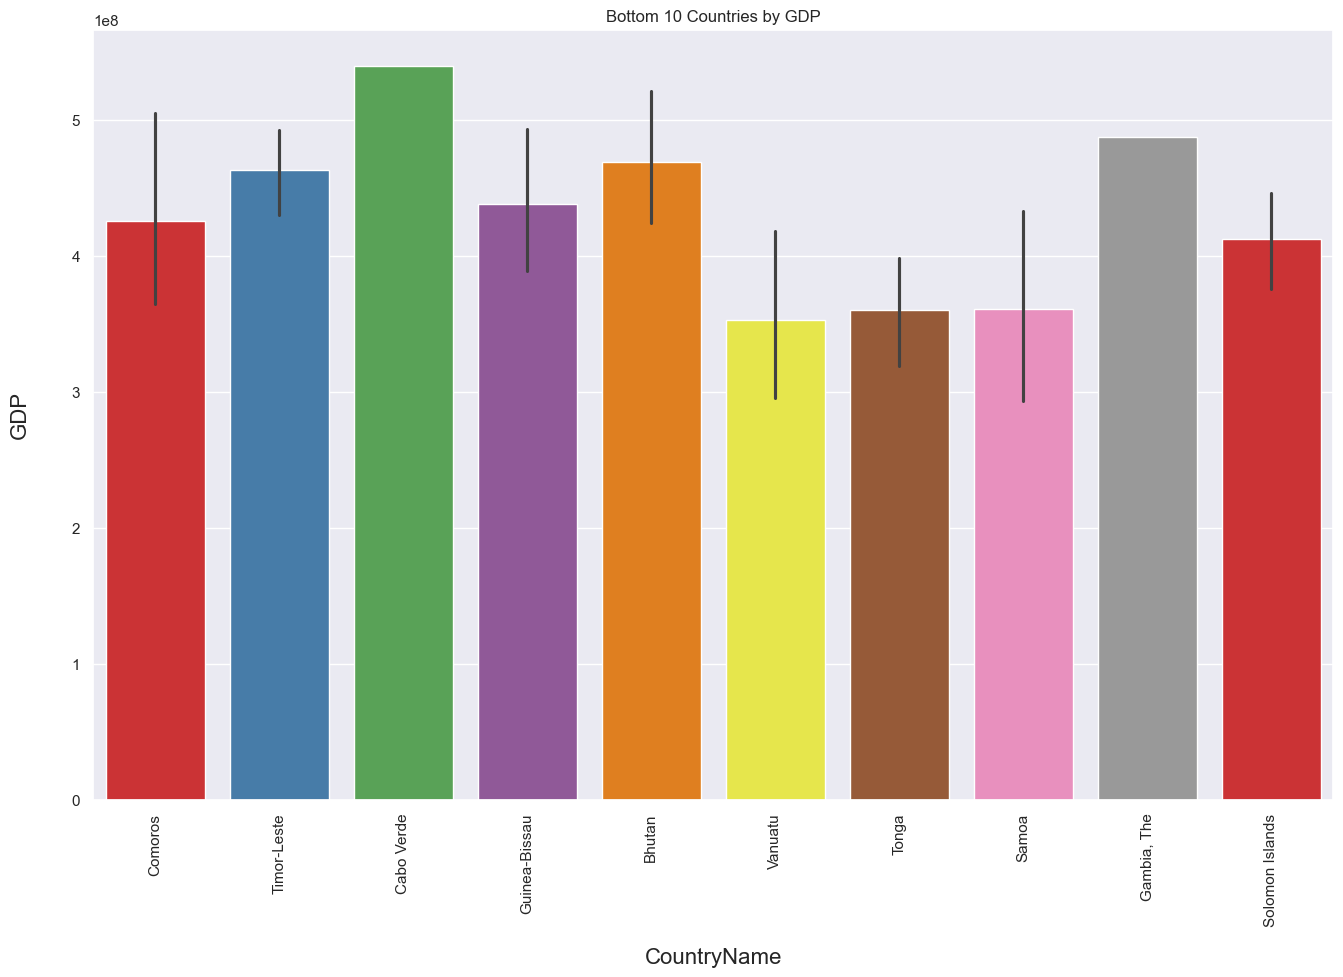

In [122]:
fig, ax = plt.subplots(figsize=(16, 10))

# Select top 10 GDP countries
top_gdp_countries = data.sort_values('GDP', ascending=False).head(145)


mean = pd.DataFrame({'CountryName': ['World mean'], 'GDP': [data['GDP'].mean()]})

gdps = pd.concat([top_gdp_countries[['CountryName','GDP']], mean], ignore_index=True)


# Plot
sb.barplot(x='CountryName', y='GDP', data=gdps, palette='Set1', ax=ax)
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()



fig, ax = plt.subplots(figsize=(16, 10))

# Select bottom 10 GDP countries
bottom_gdp_countries = data.sort_values('GDP', ascending=False).tail(65)

# Plot
sb.barplot(x='CountryName', y='GDP', data=bottom_gdp_countries, palette='Set1', ax=ax)
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.title('Bottom 10 Countries by GDP')
plt.show()

The top 10 and bottom 10 countries have extreme GDP levels, deviating significantly from the mean and median of our entire dataset. These countries could be the potential outliers in our machine learning models and it is important to consider their impact on our model performance. More on this will be explained later.

### 3.2 Correlation Matrix

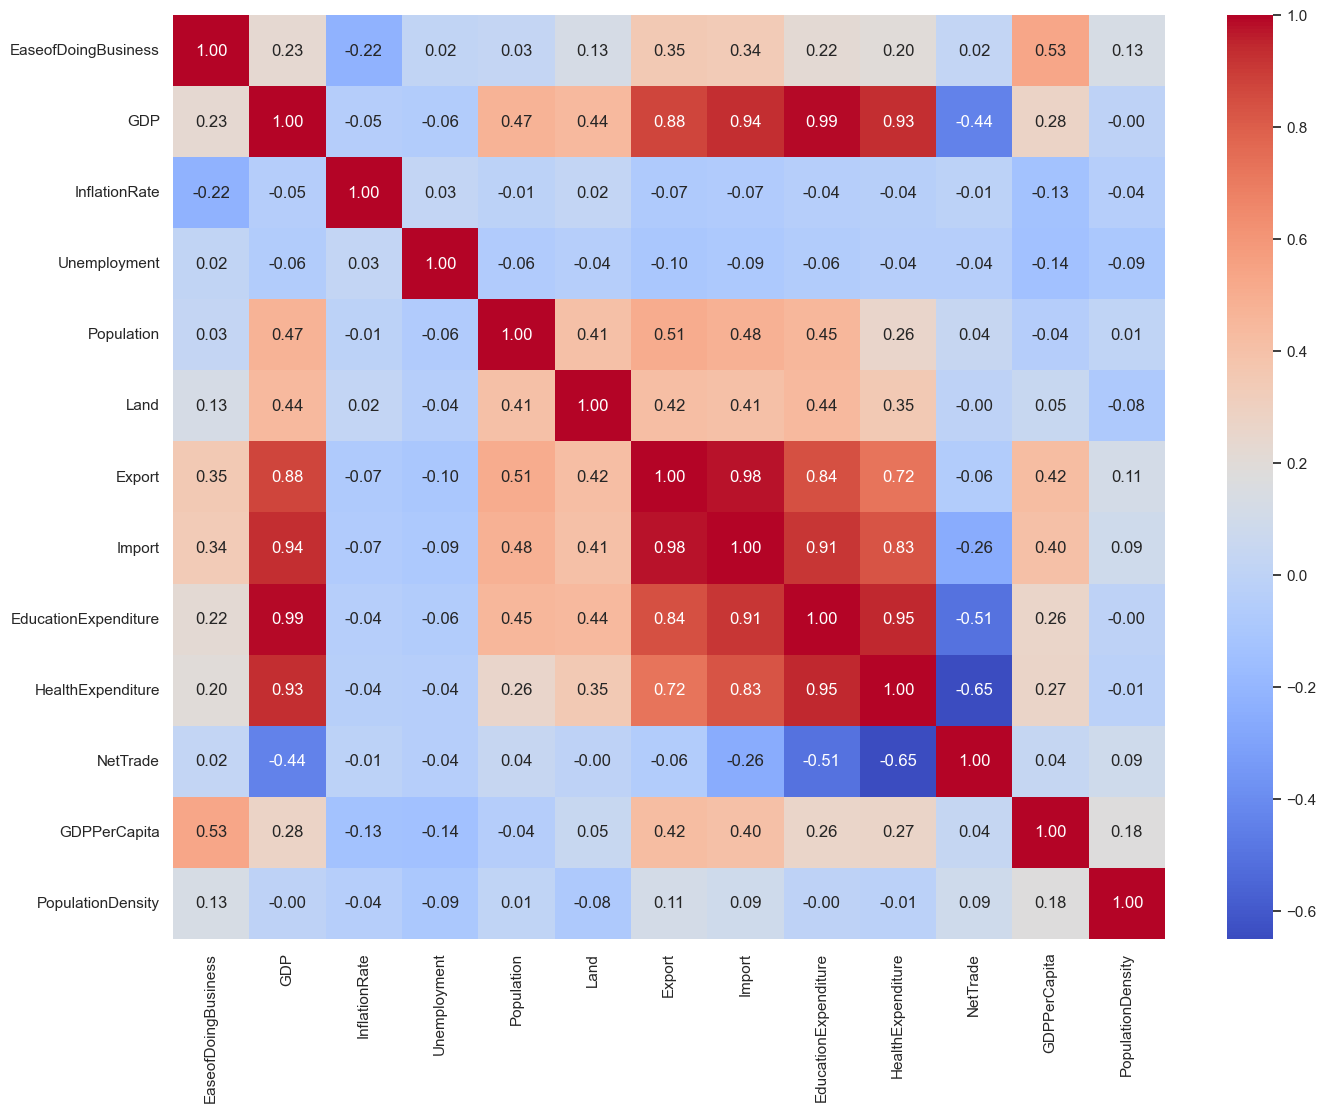

In [123]:
plt.figure(figsize=(16,12))
sb.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### 3.3 Scatter Plot of GDP Against Different Variables

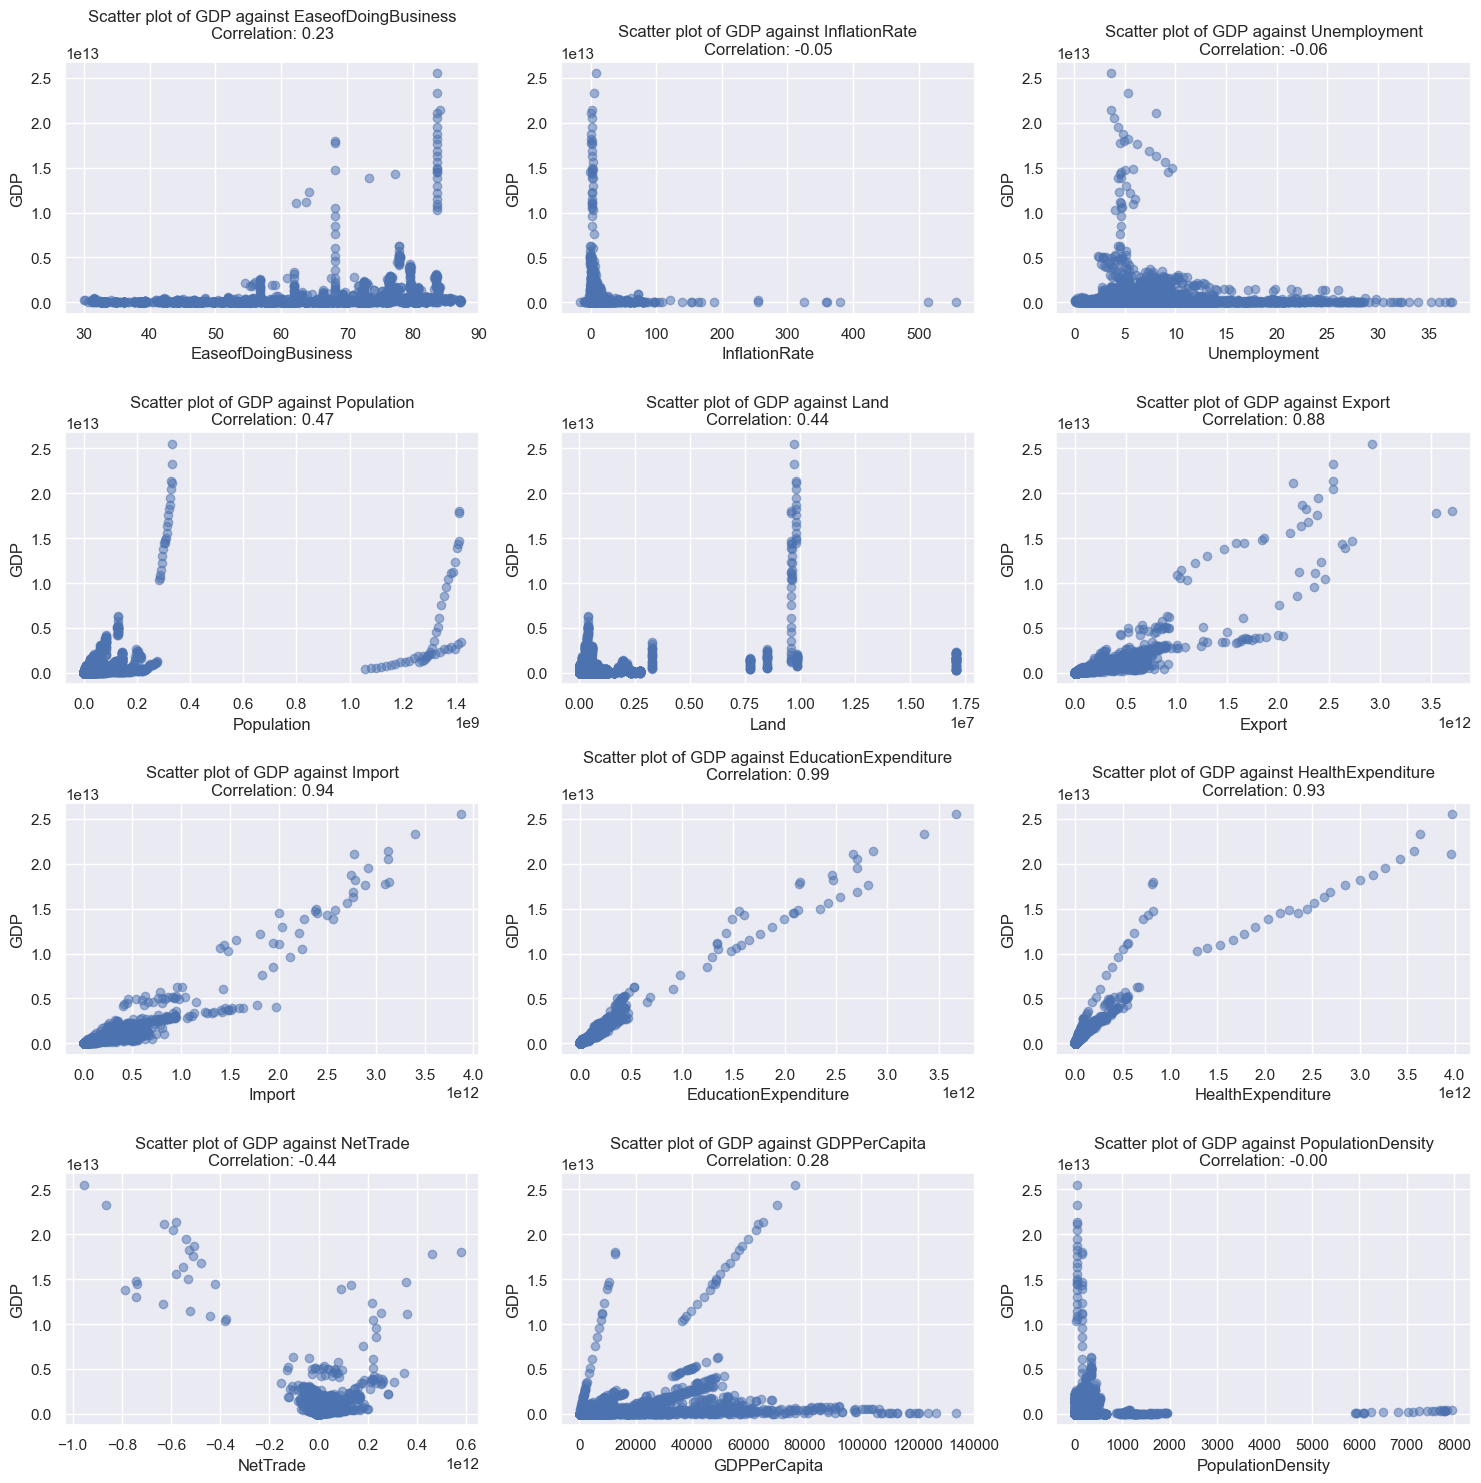

In [124]:
variables = ['EaseofDoingBusiness',
             'InflationRate',
             'Unemployment',
             'Population',
             'Land',
             'Export',
             'Import',
             'EducationExpenditure',
             'HealthExpenditure',
             'NetTrade',
             'GDPPerCapita',
             'PopulationDensity']

fig, axes = plt.subplots(4, 3, figsize=(15, 15))

row = col = 0
for i, variable in enumerate(variables):
    if(i%3==0 and i>0):
        row = row+1
    col=i%3
    ax = axes[row,col]
    ax.scatter(data[variable], data['GDP'] , alpha=0.5)
    correlation_coefficient = np.corrcoef(data['GDP'], data[variable])[0, 1]
    ax.set_title(f'Scatter plot of GDP against {variable}\nCorrelation: {correlation_coefficient:.2f}')
    ax.set_ylabel('GDP')
    ax.set_xlabel(variable)
    
plt.tight_layout()
plt.show()


Variables such as Export, Import, Education Expenditure and Health Expenditure have a strong positive linear relationship with GDP. 

Variables such as Population, Land, GDP Per Capita and Ease of Doing Business have a moderate positive linear relationship with GDP. 

Net Trade has a moderately weak linear relationship with GDP.

Variables such as Inflation Rate, Population Density and Unemployment have an extremely weak linear relationship with GDP.

### 3.4 Variable Selection for the different machine learning models 

Variable Selection is crucial as it can affect our model's performance. 

As for Linear Regression, it would make sense for us to drop the variables which have moderate or weak relationships with GDP as linear regression assumes a linear relationship between GDP and predictor variables.

As for Random Forest, it would not make sense for us to drop the variables which have moderate or weak relationships with GDP as Random Forest models are capable of handling a large number of inputs and are able to capture non-linear relationships.

As for Long Short-Term Memory, it would not make sense for us to drop the variables as there could be potential non-linear relationships. Omitting such variables could lead to bias, reducing our model's effectiveness.

## 4. Machine Learning: Linear Regression

As mentioned before, there is a high correlation between GDP against Export, Import, Education Expenditure and Health Expenditure. So we will try to predict the GDP using these variables. 

We will first conduct uni-variate linear regression to figure out which out of the 4 variables is the best at predicting GDP.
Then we will conduct multi-variate linear regression to observe their combined effects.

#### Libraries needed for Linear Regression

In [125]:
#For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

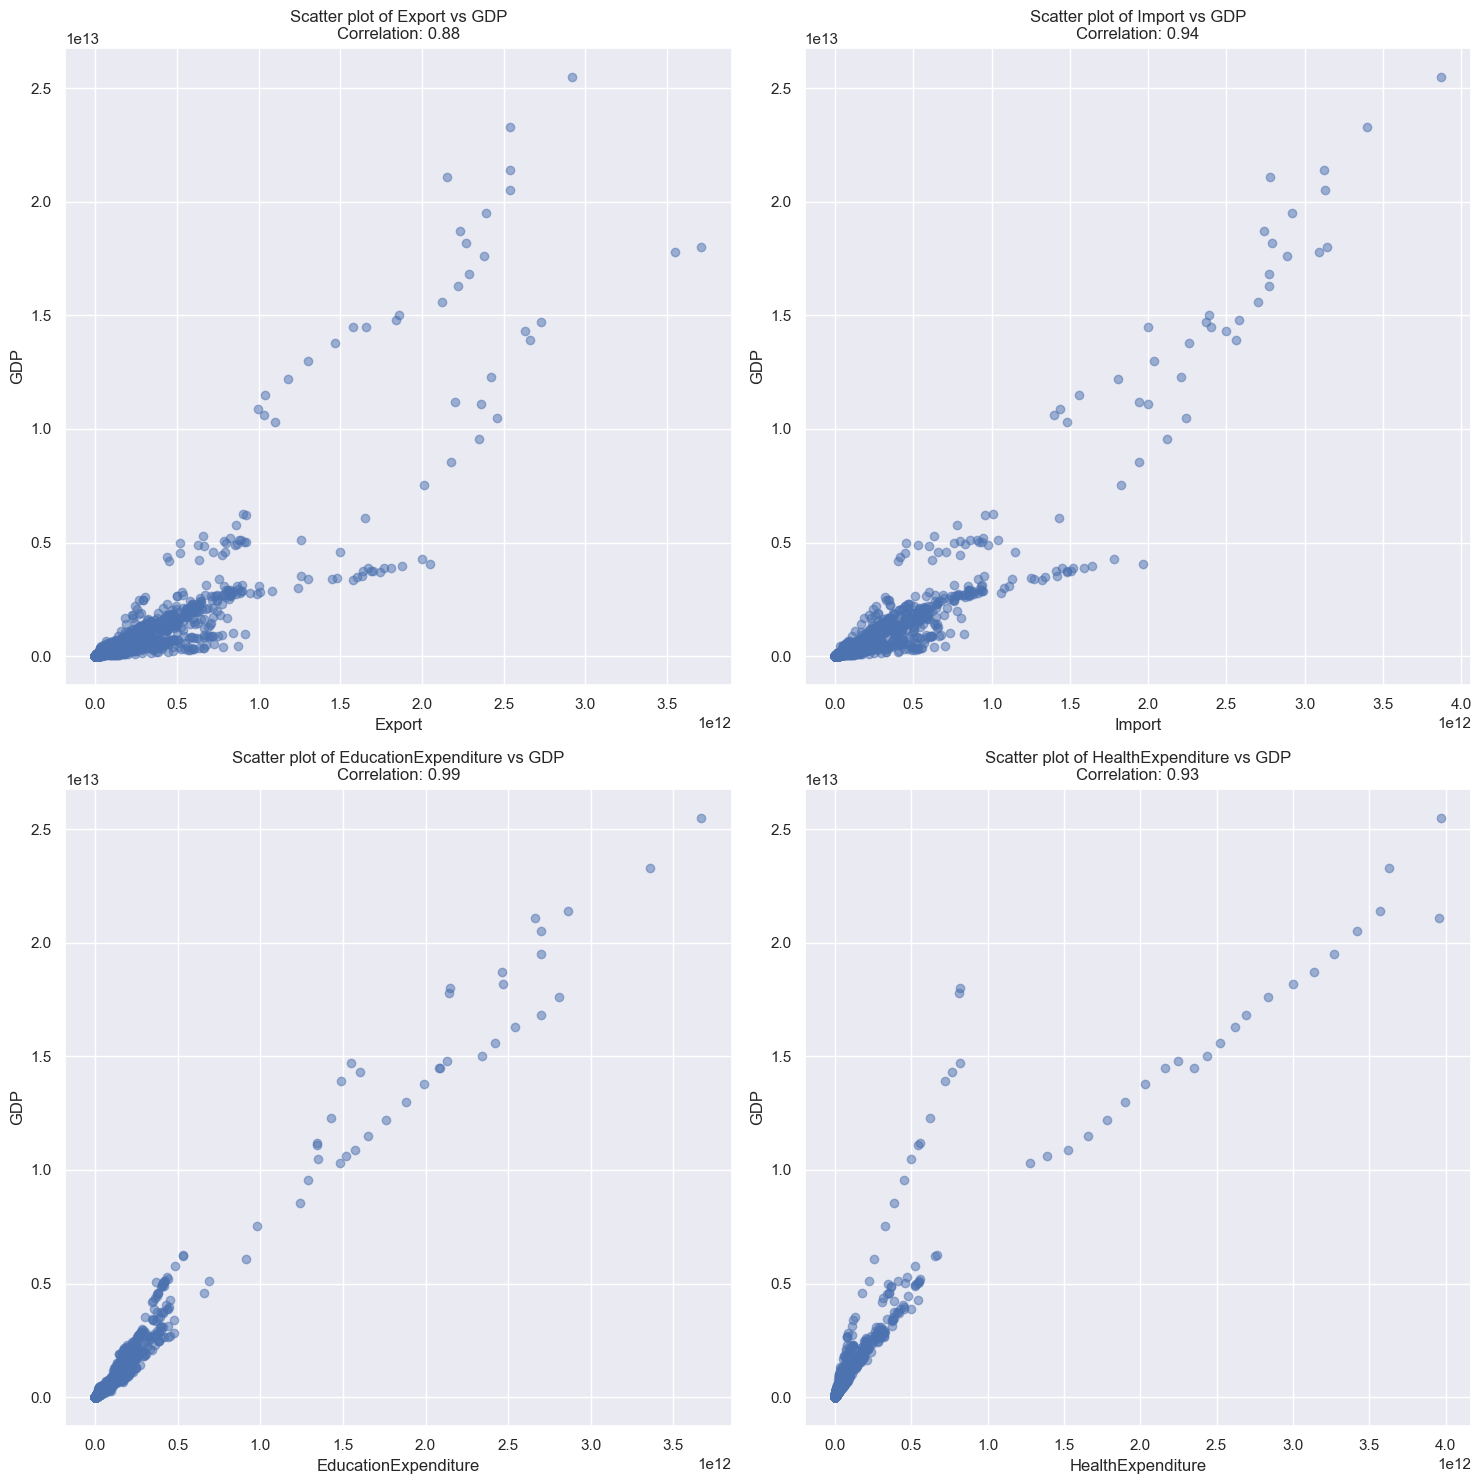

Correlation between Exports and GDP: 0.8753731615532219
Correlation between Imports and GDP: 0.9353453591900344
Correlation between Education Expenditure and GDP: 0.9875326600844415
Correlation between Health Expenditure and GDP: 0.9319336626499104


In [126]:
variables = ['Export',
             'Import',
             'EducationExpenditure',
             'HealthExpenditure',
             ]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

row = col = 0
for i, variable in enumerate(variables):
    if(i%2==0 and i>0):
        row = row+1
    col=i%2
    ax = axes[row,col]
    ax.scatter( data[variable], data['GDP'], alpha=0.5)
    correlation_coefficient = np.corrcoef(data['GDP'], data[variable])[0, 1]
    ax.set_title(f'Scatter plot of {variable} vs GDP\nCorrelation: {correlation_coefficient:.2f}')
    ax.set_xlabel(variable)
    ax.set_ylabel('GDP')
    
plt.tight_layout()
plt.show()

correlation = data.GDP.corr(data.Export)
print("Correlation between Exports and GDP:", correlation)
correlation = data.GDP.corr(data.Import)
print("Correlation between Imports and GDP:", correlation)
correlation = data.GDP.corr(data.EducationExpenditure)
print("Correlation between Education Expenditure and GDP:", correlation)
correlation = data.GDP.corr(data.HealthExpenditure)
print("Correlation between Health Expenditure and GDP:", correlation)


As we can see, all the 4 variables have an extremely high positive correlation with GDP. Now, let us proceed onto do uni variate linear regression models to explore their relationships.

---
### Export vs GDP
#### Seperating Train and Test data into 80:20 ratio

In [127]:
x = pd.DataFrame(data["Export"])
y = pd.DataFrame(data["GDP"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #0.2 for 20%

print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (3091, 1) (3091, 1)
Test Set:  (773, 1) (773, 1)


In [128]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

##### Train Data (Export vs GDP)

Coefficients: a =  [[4.94259252]]
Intercept: b =  [-1.43668843e+11]


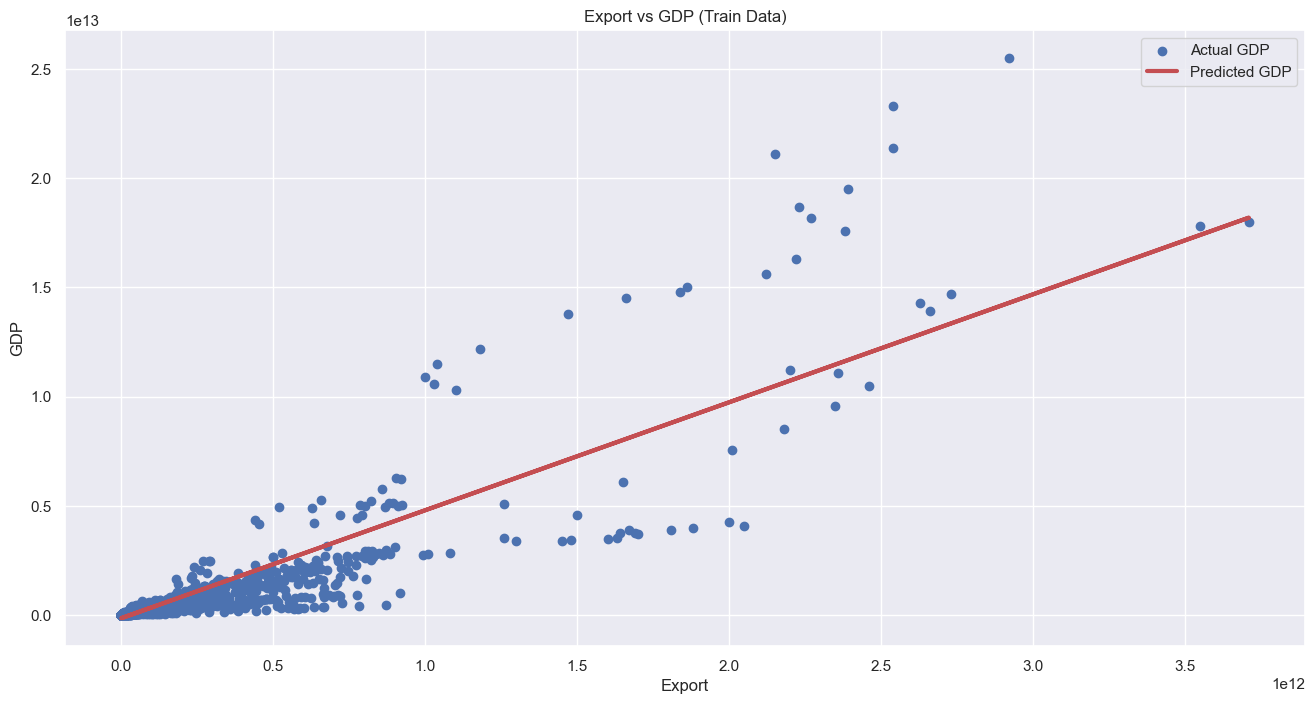

In [129]:
# Coefficients of the Linear Regression line

print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

# Predict Total values corresponding to Export Train
regline_x = x_train
regline_y = linreg.predict(x_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_train, y_train, label='Actual GDP')
plt.plot(regline_x, regline_y, 'r-', linewidth = 3, label='Predicted GDP')

# Adding title and labels
plt.title('Export vs GDP (Train Data)')
plt.xlabel('Export')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [130]:
print("Export vs GDP (Train Data):\n------------------------------------\n") 
 
# Explained Variance (R^2) (Train data) 
print("Explained Variance (R^2): ", linreg.score(x_train, y_train)) 
 
# Mean Squared Error (MSE) (Train data) 
y_train_pred = linreg.predict(x_train)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_train) - np.min(y_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Export vs GDP (Train Data):
------------------------------------

Explained Variance (R^2):  0.770816878449213
Mean Squared Error (MSE):  6.18590569737063e+23
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.03084356374013308


##### Test Data (Export vs GDP)

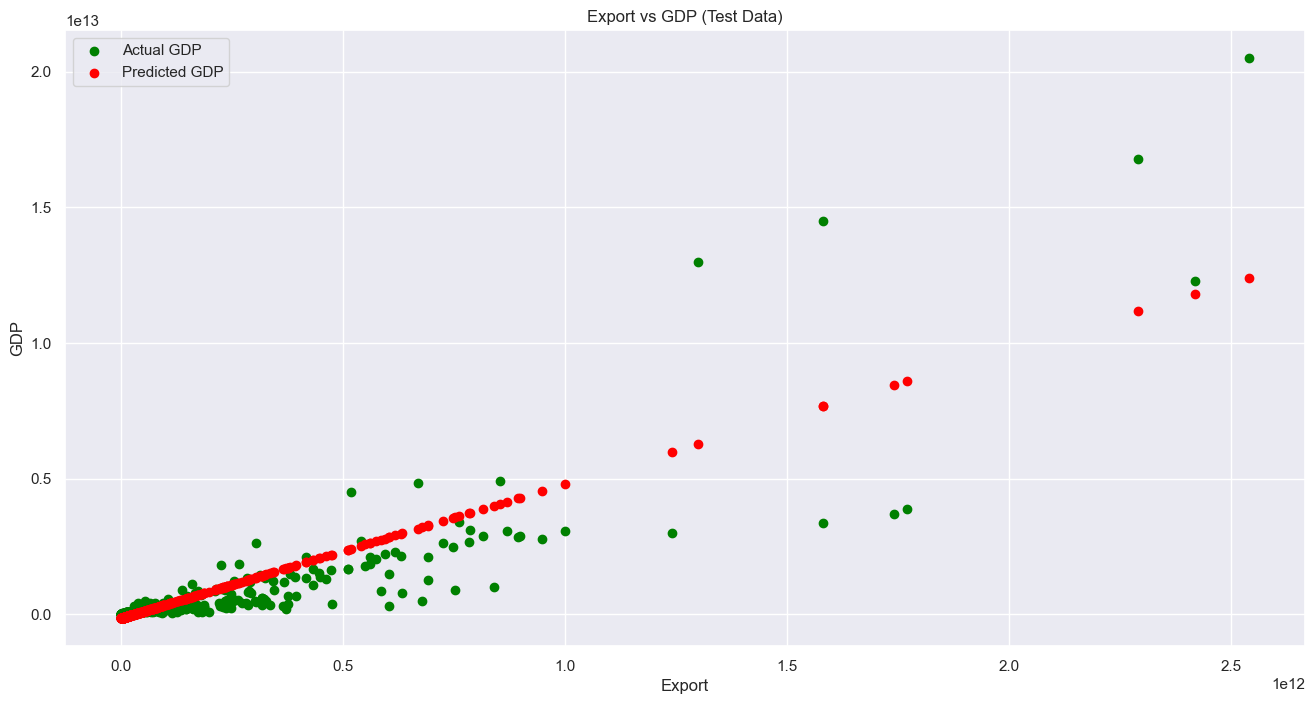

In [131]:
y_test_pred = linreg.predict(x_test)

# Use a scatterplot to show the prdictions
f = plt.figure(figsize=(16,8))  
plt.scatter(x_test, y_test, color = "green", label = 'Actual GDP')  
plt.scatter(x_test, y_test_pred, color = "red", label = 'Predicted GDP') 

# Adding title and labels
plt.title('Export vs GDP (Test Data)')
plt.xlabel('Export')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [132]:
print("Export vs GDP (Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_test, y_test))

# Mean Squared Error (MSE) (Test data) 
y_test_pred = linreg.predict(x_test)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_test) - np.min(y_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Export vs GDP (Test Data):
------------------------------------

Explained Variance (R^2):  0.7401136498691814
Mean Squared Error (MSE):  4.981446370678048e+23
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.03442930121652003


#### Removal of outliers

In [133]:
#Removal of outliers
newData = data[['Export', 'GDP']].copy()  

q1 = newData.quantile(0.25)
q3 = newData.quantile(0.75)  
    
outliers = (newData < (q1 - 1.5 * (q3 - 1))) | (newData > (q3 + 1.5 * (q3 - q1)))
outliers.sum()

Export    585
GDP       498
dtype: int64

In [134]:
outlierCheck = outliers.any(axis = 1)  
outlierCheck.value_counts()

False    3229
True      635
Name: count, dtype: int64

In [135]:
outlierRows = outliers.index[outlierCheck == True]  
outlierRows

Index([ 257,  258,  259,  260,  261,  262,  263,  264,  265,  266,
       ...
       4872, 4873, 4874, 4875, 4985, 4986, 4987, 4988, 4989, 4990],
      dtype='int64', length=635)

In [136]:
# Removing the outliers to clean the data  
newData.drop(axis = 0,
            index = outlierRows,
            inplace = True)

In [137]:
x_clean = pd.DataFrame(newData["Export"])
y_clean = pd.DataFrame(newData["GDP"])  

x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(x_clean, y_clean, test_size = 0.2) #0.2 for 20%.  
  
print("Train Set :", x_clean_train.shape, y_clean_train.shape)
print("Test Set  :", x_clean_test.shape, y_clean_test.shape)

Train Set : (2583, 1) (2583, 1)
Test Set  : (646, 1) (646, 1)


In [138]:
linreg.fit(x_clean_train, y_clean_train)

LinearRegression()

In [139]:
print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

Coefficients: a =  [[2.11918179]]
Intercept: b =  [1.27832475e+10]


#### Clean Train Data (Export vs GDP)

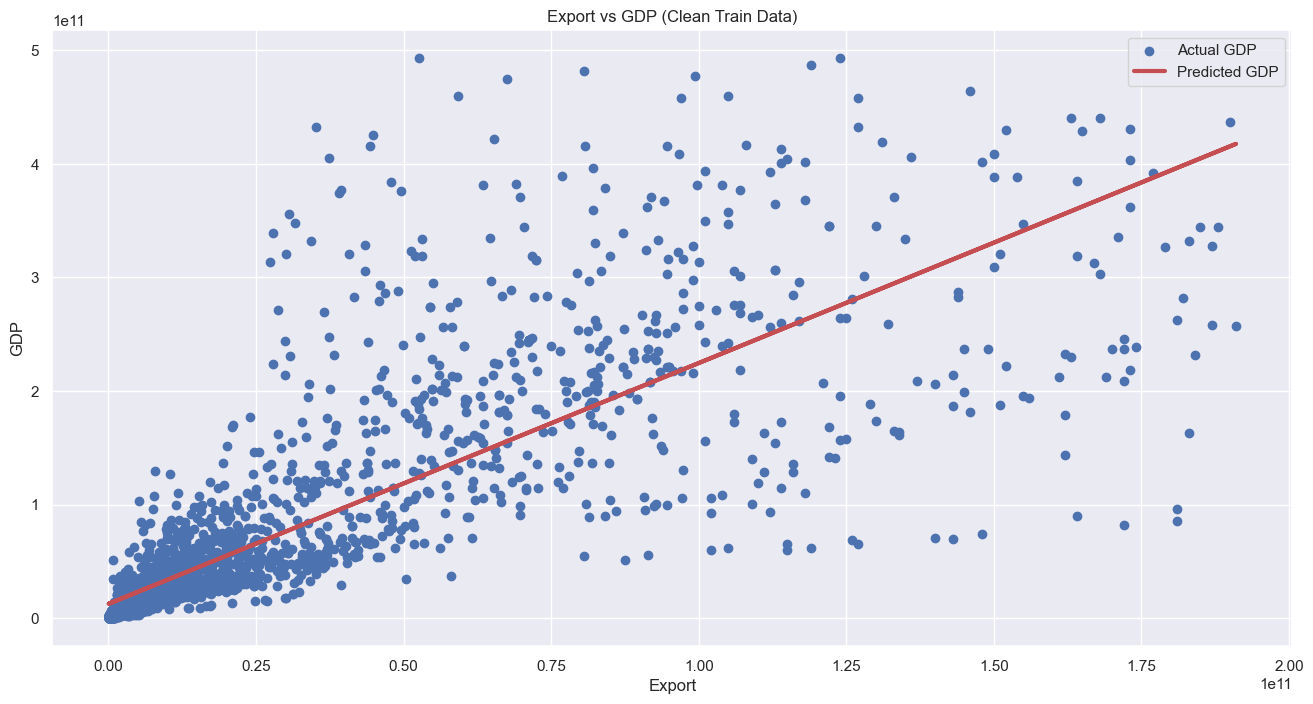

In [140]:
# Plotting the regression line  
regline_x_clean = x_clean_train
regline_y_clean = linreg.predict(x_clean_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_clean_train, y_clean_train, label = 'Actual GDP')
plt.plot(regline_x_clean, regline_y_clean, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Export vs GDP (Clean Train Data)')
plt.xlabel('Export')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [141]:
print("Export vs GDP (Clean Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data)
print("Explained Variance (R^2): ", linreg.score(x_clean_train, y_clean_train))

# Mean Squared Error (MSE) (Train data)
y_clean_train_pred = linreg.predict(x_clean_train)  
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_train, y_clean_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_clean_train, y_clean_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_train) - np.min(y_clean_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Export vs GDP (Clean Train Data):
------------------------------------

Explained Variance (R^2):  0.6749554475699431
Mean Squared Error (MSE):  2.948477691346262e+21
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.11018223644352998


#### Clean Test Data (Export vs GDP)

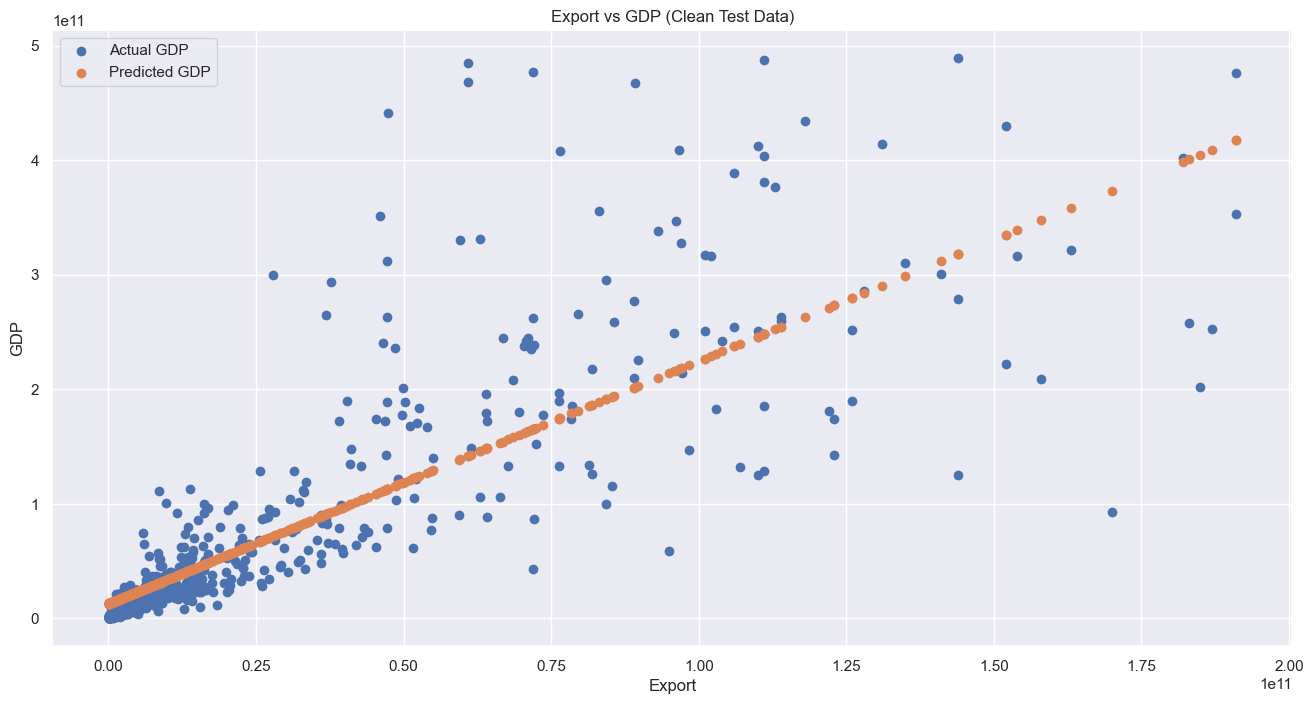

In [142]:
# Goodness of Fit end

y_clean_test_pred = linreg.predict(x_clean_test)

# Use a scatterplot to show the prdictions  
f = plt.figure(figsize=(16,8))  
plt.scatter(x_clean_test, y_clean_test, label = 'Actual GDP')  
plt.scatter(x_clean_test, y_clean_test_pred, label = 'Predicted GDP')

# Adding title and labels
plt.title('Export vs GDP (Clean Test Data)')
plt.xlabel('Export')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [143]:
print("Export vs GDP (Clean Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_clean_test, y_clean_test))

# Mean Squared Error (MSE) (Test data)
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_test, y_clean_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_clean_test, y_clean_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_test) - np.min(y_clean_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Export vs GDP (Clean Test Data):
------------------------------------

Explained Variance (R^2):  0.7014964865115477
Mean Squared Error (MSE):  3.096885907048757e+21
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.11386328309062452


---
### Import vs GDP
#### Seperating Train and Test data into 80:20 ratio

In [144]:
x = pd.DataFrame(data["Import"])
y = pd.DataFrame(data["GDP"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #0.2 for 20%

print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (3091, 1) (3091, 1)
Test Set:  (773, 1) (773, 1)


In [145]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

##### Train Data (Import vs GDP)

Coefficients: a =  [[5.13279612]]
Intercept: b =  [-1.47406424e+11]


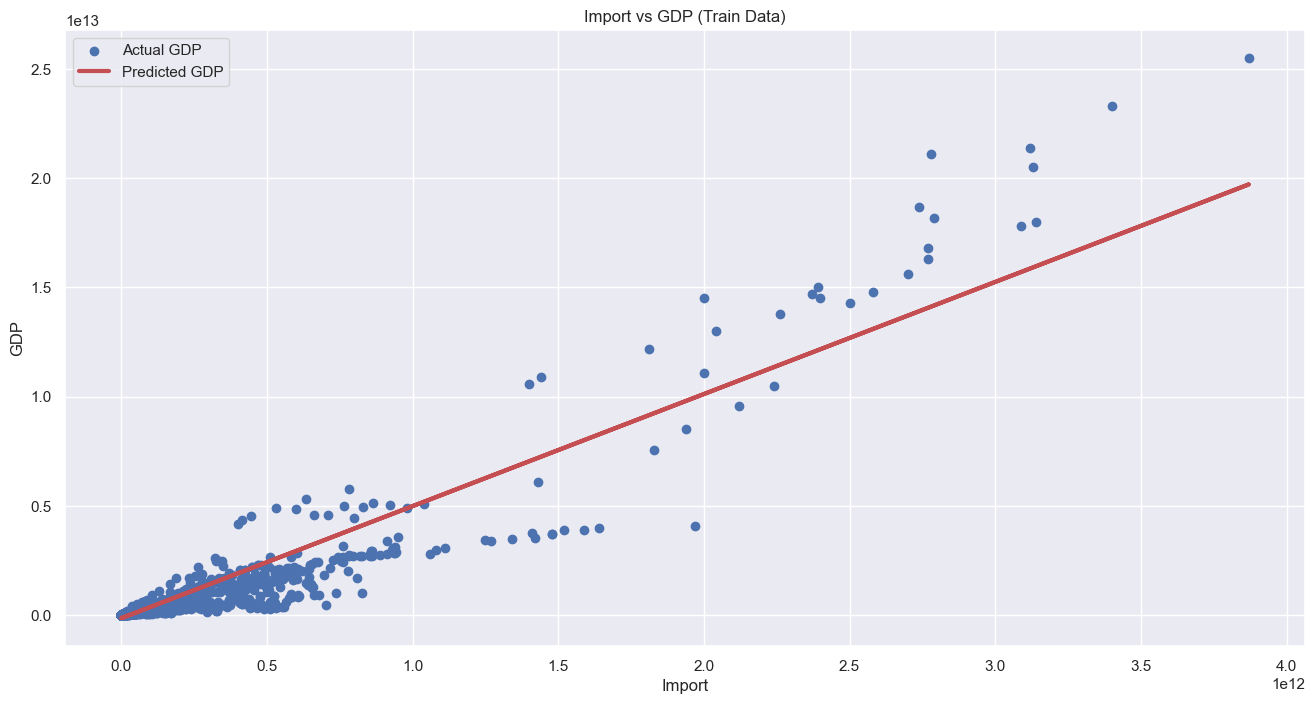

In [146]:
# Coefficients of the Linear Regression line

print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

# Predict Total values corresponding to Import Train
regline_x = x_train
regline_y = linreg.predict(x_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_train, y_train, label = 'Actual GDP')
plt.plot(regline_x, regline_y, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Import vs GDP (Train Data)')
plt.xlabel('Import')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [147]:
print("Import vs GDP (Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data) 
print("Explained Variance (R^2): ", linreg.score(x_train, y_train)) 
 
# Mean Squared Error (MSE) (Train data) 
y_train_pred = linreg.predict(x_train)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_train) - np.min(y_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Import vs GDP (Train Data):
------------------------------------

Explained Variance (R^2):  0.877696685342821
Mean Squared Error (MSE):  3.180784360769505e+23
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.02211719351910003


##### Test Data (Import vs GDP)

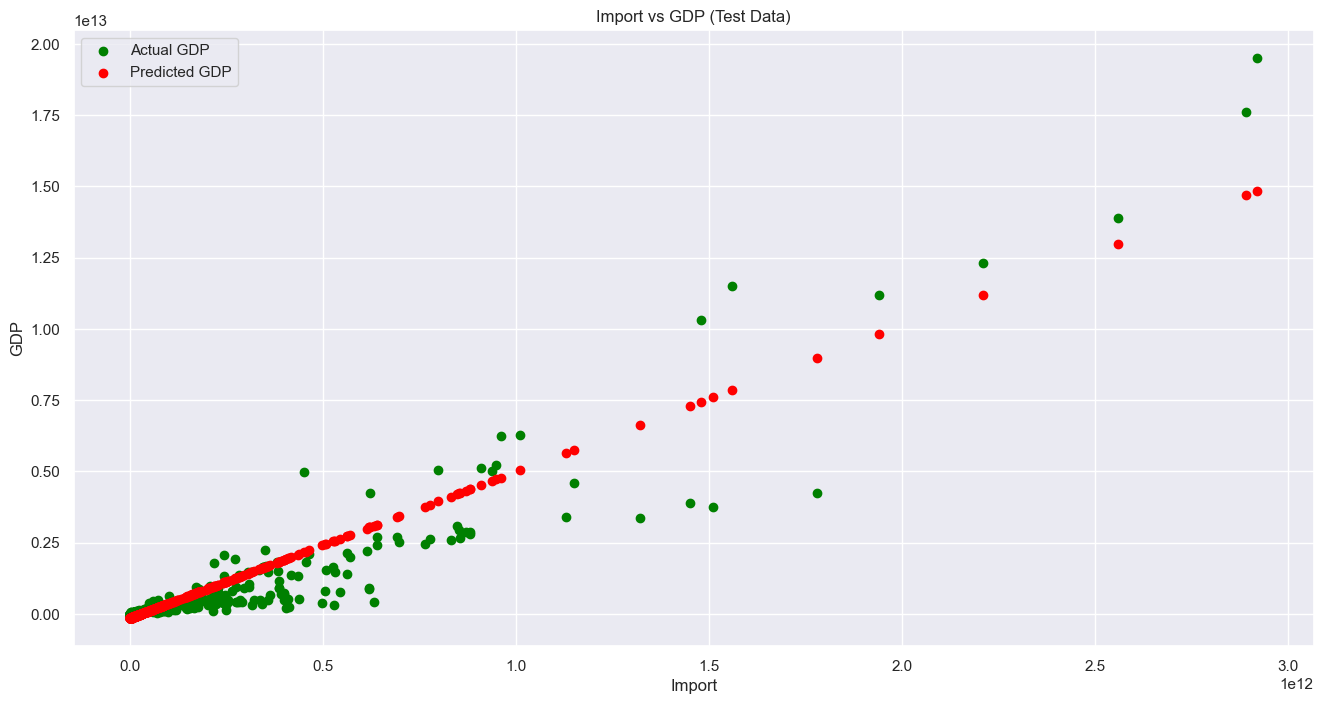

In [148]:
y_test_pred = linreg.predict(x_test)

# Use a scatterplot to show the prdictions
f = plt.figure(figsize=(16,8))  
plt.scatter(x_test, y_test, color = "green", label = 'Actual GDP')  
plt.scatter(x_test, y_test_pred, color = "red", label = 'Predicted GDP')

# Adding title and labels
plt.title('Import vs GDP (Test Data)')
plt.xlabel('Import')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [149]:
print("Import vs GDP (Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_test, y_test))

# Mean Squared Error (MSE) (Test data) 
y_test_pred = linreg.predict(x_test)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_test) - np.min(y_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Import vs GDP (Test Data):
------------------------------------

Explained Variance (R^2):  0.8616106557855088
Mean Squared Error (MSE):  3.2006375896273495e+23
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.029012788373903017


#### Removal of outliers

In [150]:
#Removal of outliers
newData = data[['Import', 'GDP']].copy()  

q1 = newData.quantile(0.25)
q3 = newData.quantile(0.75)  
    
outliers = (newData < (q1 - 1.5 * (q3 - 1))) | (newData > (q3 + 1.5 * (q3 - q1)))
outliers.sum()

Import    590
GDP       498
dtype: int64

In [151]:
outlierCheck = outliers.any(axis = 1)  
outlierCheck.value_counts()

False    3236
True      628
Name: count, dtype: int64

In [152]:
outlierRows = outliers.index[outlierCheck == True]  
outlierRows

Index([ 257,  258,  259,  260,  261,  262,  263,  264,  265,  266,
       ...
       4873, 4874, 4875, 4984, 4985, 4986, 4987, 4988, 4989, 4990],
      dtype='int64', length=628)

In [153]:
# Removing the outliers to clean the data  
newData.drop(axis = 0,
            index = outlierRows,
            inplace = True)

In [154]:
x_clean = pd.DataFrame(newData["Import"])
y_clean = pd.DataFrame(newData["GDP"])  

x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(x_clean, y_clean, test_size = 0.2) #0.2 for 20%.  
  
print("Train Set :", x_clean_train.shape, y_clean_train.shape)
print("Test Set  :", x_clean_test.shape, y_clean_test.shape)

Train Set : (2588, 1) (2588, 1)
Test Set  : (648, 1) (648, 1)


In [155]:
linreg.fit(x_clean_train, y_clean_train)

LinearRegression()

In [156]:
print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

Coefficients: a =  [[2.45584167]]
Intercept: b =  [6.90829102e+09]


#### Clean Train Data (Import vs GDP)

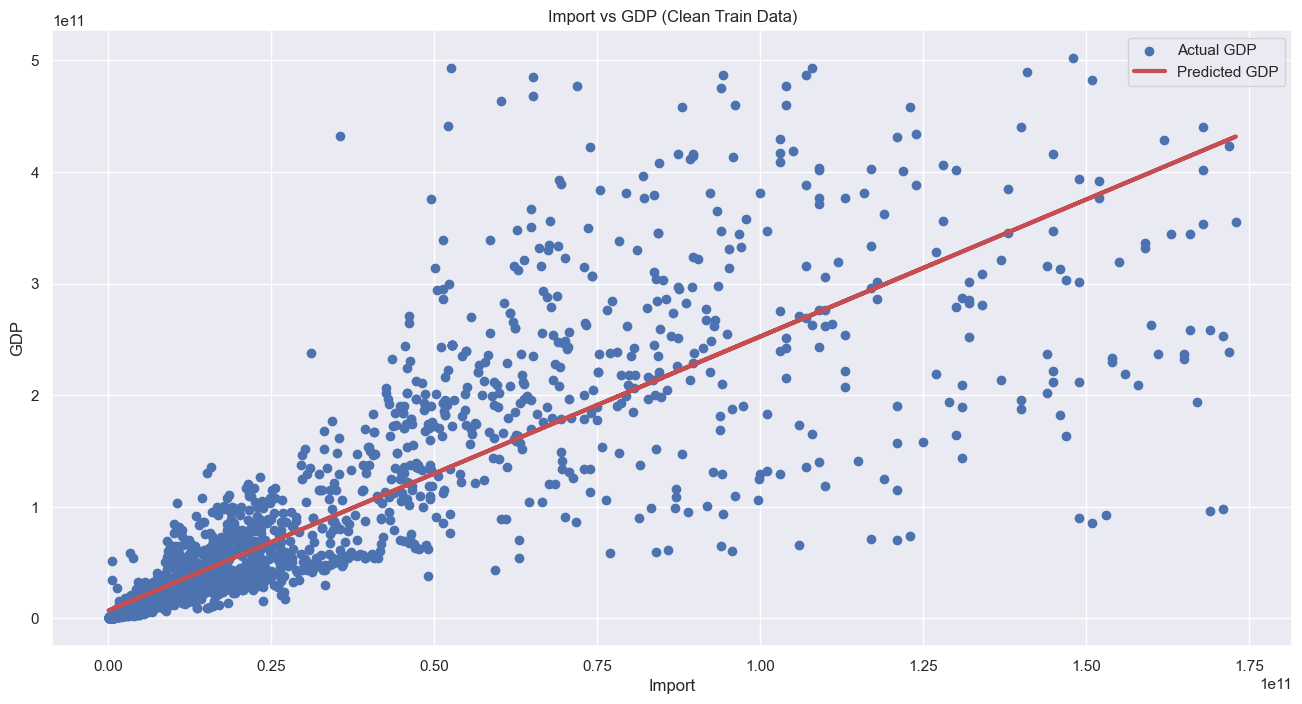

In [157]:
# Plotting the regression line  
regline_x_clean = x_clean_train
regline_y_clean = linreg.predict(x_clean_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_clean_train, y_clean_train, label = 'Actual GDP')
plt.plot(regline_x_clean, regline_y_clean, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Import vs GDP (Clean Train Data)')
plt.xlabel('Import')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [158]:
print("Import vs GDP (Clean Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data)
print("Explained Variance (R^2): ", linreg.score(x_clean_train, y_clean_train))

# Mean Squared Error (MSE) (Train data)
y_clean_train_pred = linreg.predict(x_clean_train)  
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_train, y_clean_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_clean_train, y_clean_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_train) - np.min(y_clean_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Import vs GDP (Clean Train Data):
------------------------------------

Explained Variance (R^2):  0.7336799335648057
Mean Squared Error (MSE):  2.57072284629178e+21
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.10103704345863938


#### Clean Test Data (Import vs GDP)

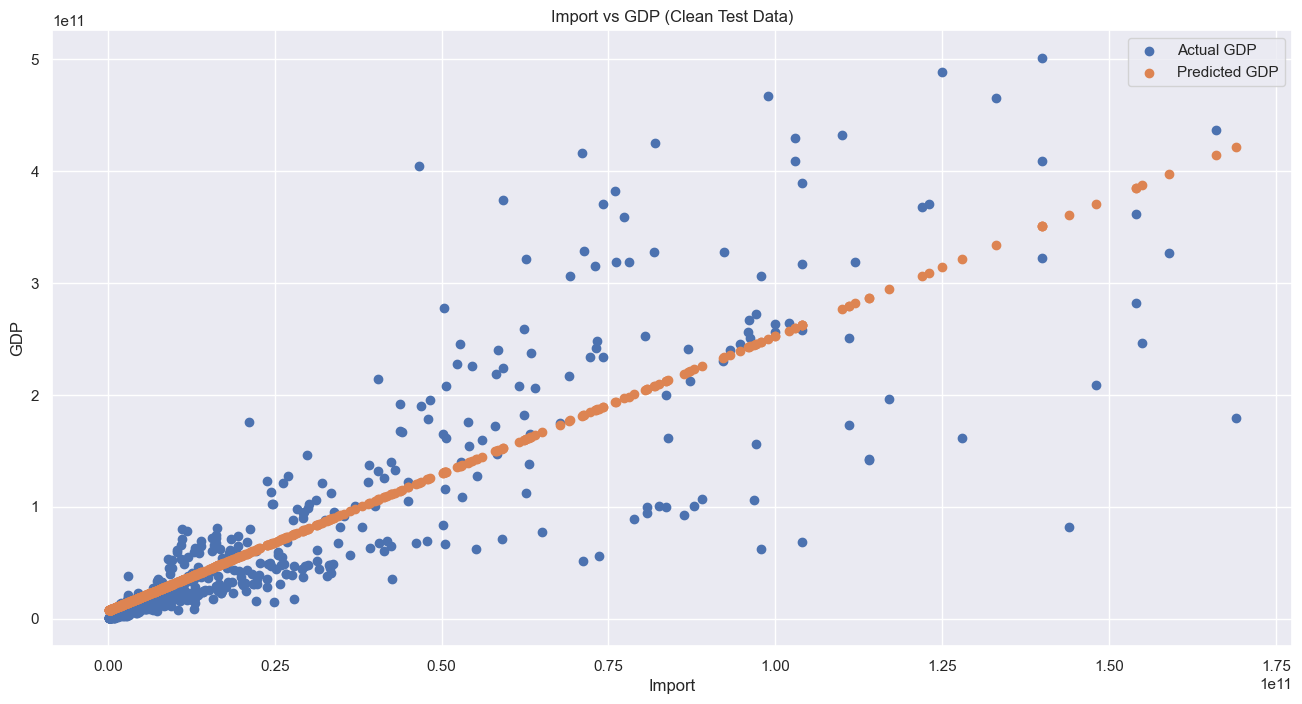

In [159]:
# Goodness of Fit end

y_clean_test_pred = linreg.predict(x_clean_test)

# Use a scatterplot to show the prdictions  
f = plt.figure(figsize=(16,8))  
plt.scatter(x_clean_test, y_clean_test, label = 'Actual GDP')  
plt.scatter(x_clean_test, y_clean_test_pred, label = 'Predicted GDP')  

# Adding title and labels
plt.title('Import vs GDP (Clean Test Data)')
plt.xlabel('Import')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [160]:
print("Import vs GDP (Clean Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_clean_test, y_clean_test))

# Mean Squared Error (MSE) (Test data)
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_test, y_clean_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_clean_test, y_clean_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_test) - np.min(y_clean_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Import vs GDP (Clean Test Data):
------------------------------------

Explained Variance (R^2):  0.7379323186735374
Mean Squared Error (MSE):  2.42589678391908e+21
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.09837150238949935


---
### Education Expenditure vs GDP
#### Seperating Train and Test data into 80:20 ratio

In [161]:
x = pd.DataFrame(data["EducationExpenditure"])
y = pd.DataFrame(data["GDP"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #0.2 for 20%

print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (3091, 1) (3091, 1)
Test Set:  (773, 1) (773, 1)


In [162]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

#### Train Data (Education Expenditure vs GDP)

Coefficients: a =  [[7.38731387]]
Intercept: b =  [2.33985575e+10]


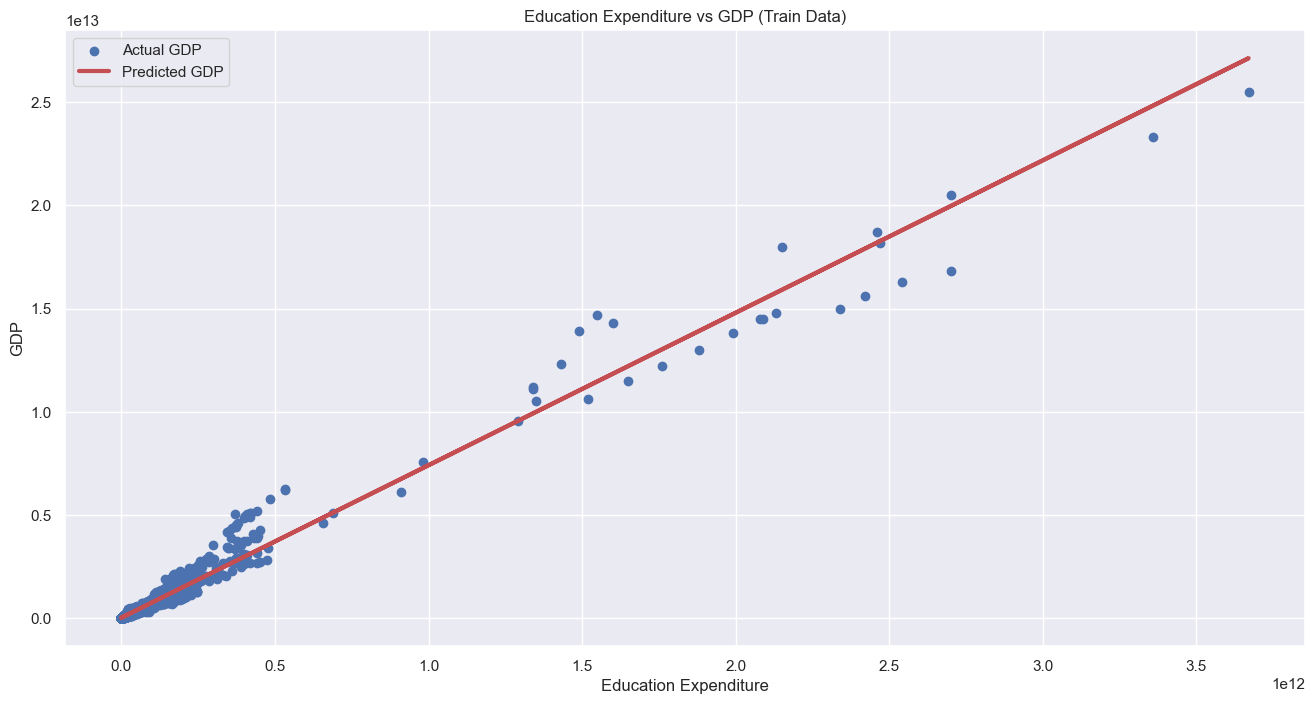

In [163]:
# Coefficients of the Linear Regression line

print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

# Predict Total values corresponding to Education Expenditure Train
regline_x = x_train
regline_y = linreg.predict(x_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_train, y_train, label = 'Actual GDP')
plt.plot(regline_x, regline_y, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Education Expenditure vs GDP (Train Data)')
plt.xlabel('Education Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [164]:
print("Education Expenditure vs GDP (Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data) 
print("Explained Variance (R^2): ", linreg.score(x_train, y_train)) 
 
# Mean Squared Error (MSE) (Train data) 
y_train_pred = linreg.predict(x_train)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_train) - np.min(y_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Education Expenditure vs GDP (Train Data):
------------------------------------

Explained Variance (R^2):  0.9719618158046472
Mean Squared Error (MSE):  6.787992932087284e+22
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.010217239999589886


#### Test Data (Education Expenditure vs GDP)

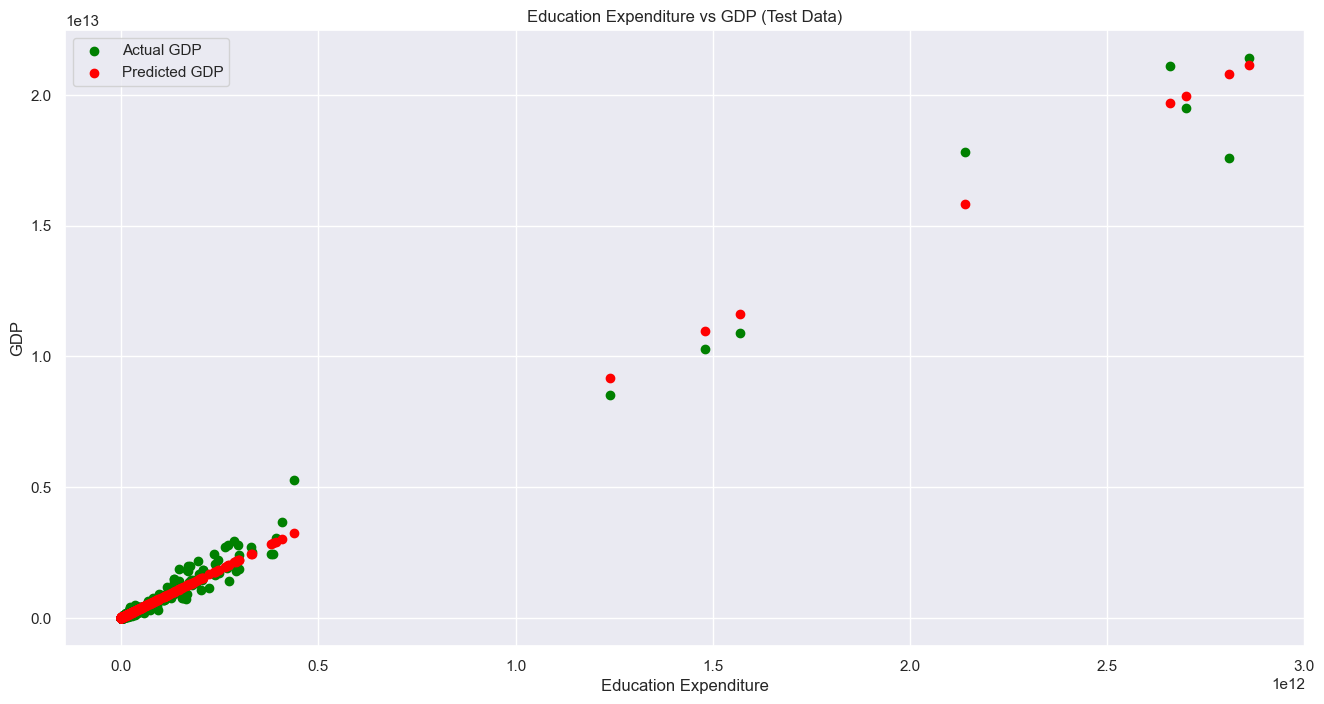

In [165]:
y_test_pred = linreg.predict(x_test)

# Use a scatterplot to show the prdictions
f = plt.figure(figsize=(16,8))  
plt.scatter(x_test, y_test, color = "green", label = 'Actual GDP')  
plt.scatter(x_test, y_test_pred, color = "red", label = 'Predicted GDP')  

# Adding title and labels
plt.title('Education Expenditure vs GDP (Test Data)')
plt.xlabel('Education Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [166]:
print("Education Expenditure vs GDP (Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_test, y_test))

# Mean Squared Error (MSE) (Test data) 
y_test_pred = linreg.predict(x_test)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_test) - np.min(y_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Education Expenditure vs GDP (Test Data):
------------------------------------

Explained Variance (R^2):  0.9856075787227386
Mean Squared Error (MSE):  4.3636250009370056e+22
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.009761456389095795


#### Removal of outliers

In [167]:
#Removal of outliers
newData = data[['EducationExpenditure', 'GDP']].copy()  

q1 = newData.quantile(0.25)
q3 = newData.quantile(0.75)  
    
outliers = (newData < (q1 - 1.5 * (q3 - 1))) | (newData > (q3 + 1.5 * (q3 - q1)))
outliers.sum()

EducationExpenditure    552
GDP                     498
dtype: int64

In [168]:
outlierCheck = outliers.any(axis = 1)  
outlierCheck.value_counts()

False    3292
True      572
Name: count, dtype: int64

In [169]:
outlierRows = outliers.index[outlierCheck == True]  
outlierRows

Index([ 257,  258,  259,  260,  261,  262,  263,  264,  265,  266,
       ...
       4870, 4871, 4872, 4873, 4874, 4875, 4955, 4957, 4958, 4959],
      dtype='int64', length=572)

In [170]:
# Removing the outliers to clean the data  
newData.drop(axis = 0,
            index = outlierRows,
            inplace = True)

In [171]:
x_clean = pd.DataFrame(newData["EducationExpenditure"])
y_clean = pd.DataFrame(newData["GDP"])  

x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(x_clean, y_clean, test_size = 0.2) #0.2 for 20%.  
  
print("Train Set :", x_clean_train.shape, y_clean_train.shape)
print("Test Set  :", x_clean_test.shape, y_clean_test.shape)

Train Set : (2633, 1) (2633, 1)
Test Set  : (659, 1) (659, 1)


In [172]:
linreg.fit(x_clean_train, y_clean_train)

LinearRegression()

In [173]:
print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

Coefficients: a =  [[7.02132771]]
Intercept: b =  [4.29766138e+09]


#### Clean Train Data (Education Expenditure vs GDP)

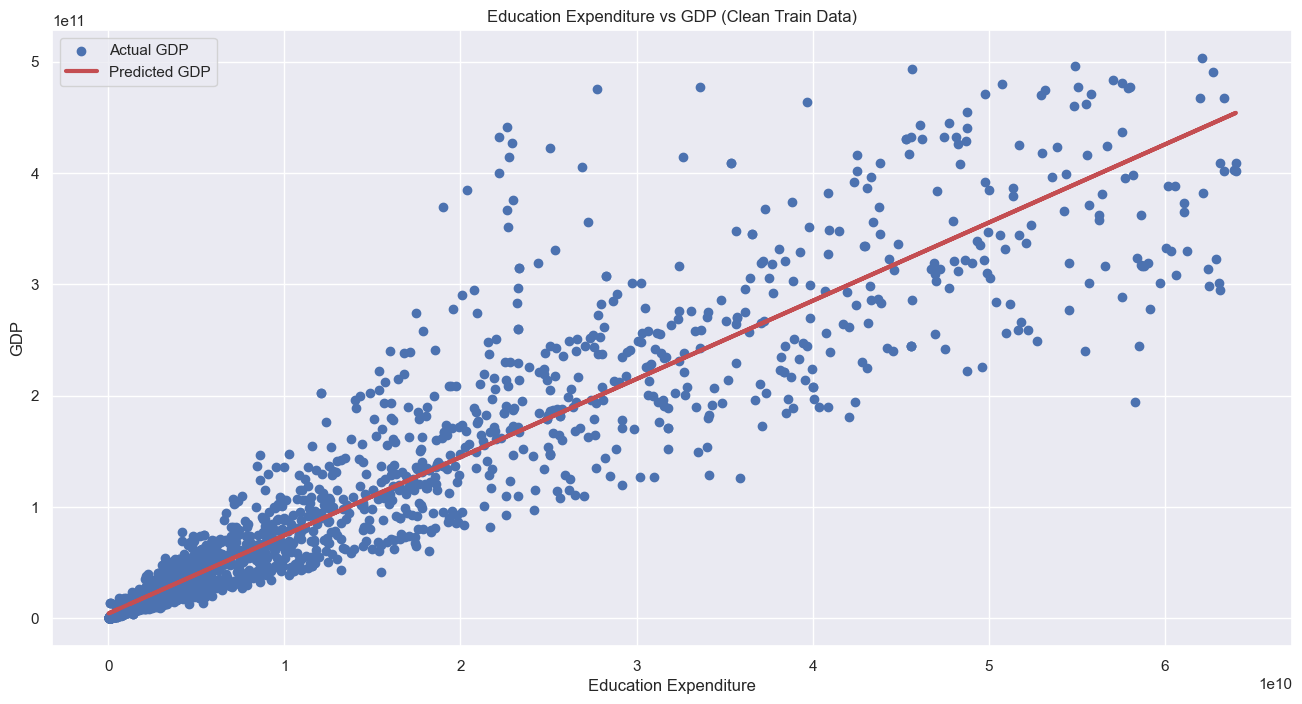

In [174]:
# Plotting the regression line  
regline_x_clean = x_clean_train
regline_y_clean = linreg.predict(x_clean_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_clean_train, y_clean_train, label = 'Actual GDP')
plt.plot(regline_x_clean, regline_y_clean, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Education Expenditure vs GDP (Clean Train Data)')
plt.xlabel('Education Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [175]:
print("Education Expenditure vs GDP (Clean Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data)
print("Explained Variance (R^2): ", linreg.score(x_clean_train, y_clean_train))

# Mean Squared Error (MSE) (Train data)
y_clean_train_pred = linreg.predict(x_clean_train)  
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_train, y_clean_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_clean_train, y_clean_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_train) - np.min(y_clean_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Education Expenditure vs GDP (Clean Train Data):
------------------------------------

Explained Variance (R^2):  0.8800576386840697
Mean Squared Error (MSE):  1.3131533653490758e+21
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.07206861016330988


#### Clean Test Data (Education Expenditure vs GDP)

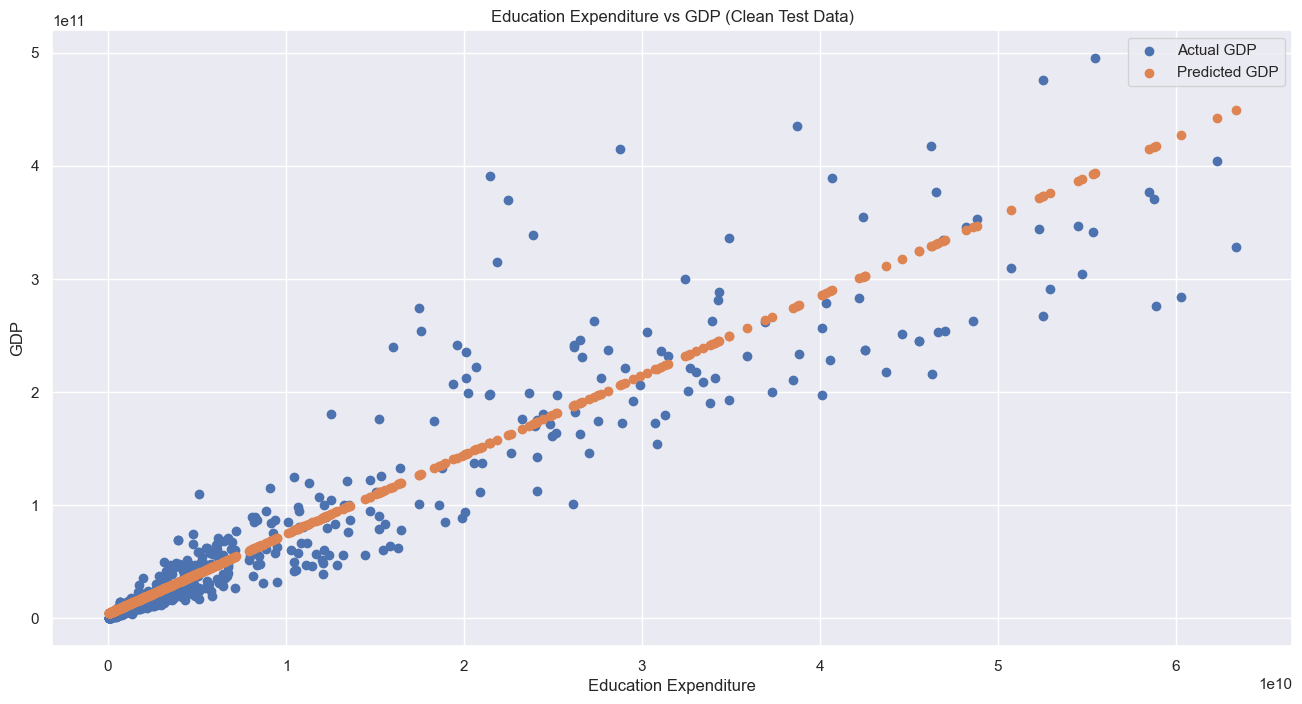

In [176]:
# Goodness of Fit end

y_clean_test_pred = linreg.predict(x_clean_test)

# Use a scatterplot to show the prdictions  
f = plt.figure(figsize=(16,8))  
plt.scatter(x_clean_test, y_clean_test, label = 'Actual GDP')  
plt.scatter(x_clean_test, y_clean_test_pred, label = 'Predicted GDP') 

# Adding title and labels
plt.title('Education Expenditure vs GDP (Clean Test Data)')
plt.xlabel('Education Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [177]:
print("Education Expenditure vs GDP (Clean Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_clean_test, y_clean_test))

# Mean Squared Error (MSE) (Test data)
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_test, y_clean_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_clean_test, y_clean_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_test) - np.min(y_clean_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Education Expenditure vs GDP (Clean Test Data):
------------------------------------

Explained Variance (R^2):  0.8734582501195658
Mean Squared Error (MSE):  1.1038047489874319e+21
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.06714958727378705


---
### Health Expenditure vs GDP
#### Seperating Train and Test data into 80:20 ratio

In [178]:
x = pd.DataFrame(data["HealthExpenditure"])
y = pd.DataFrame(data["GDP"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #0.2 for 20%

print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (3091, 1) (3091, 1)
Test Set:  (773, 1) (773, 1)


In [179]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

#### Train Data (Health Expenditure vs GDP)

Coefficients: a =  [[6.9347242]]
Intercept: b =  [1.3747758e+11]


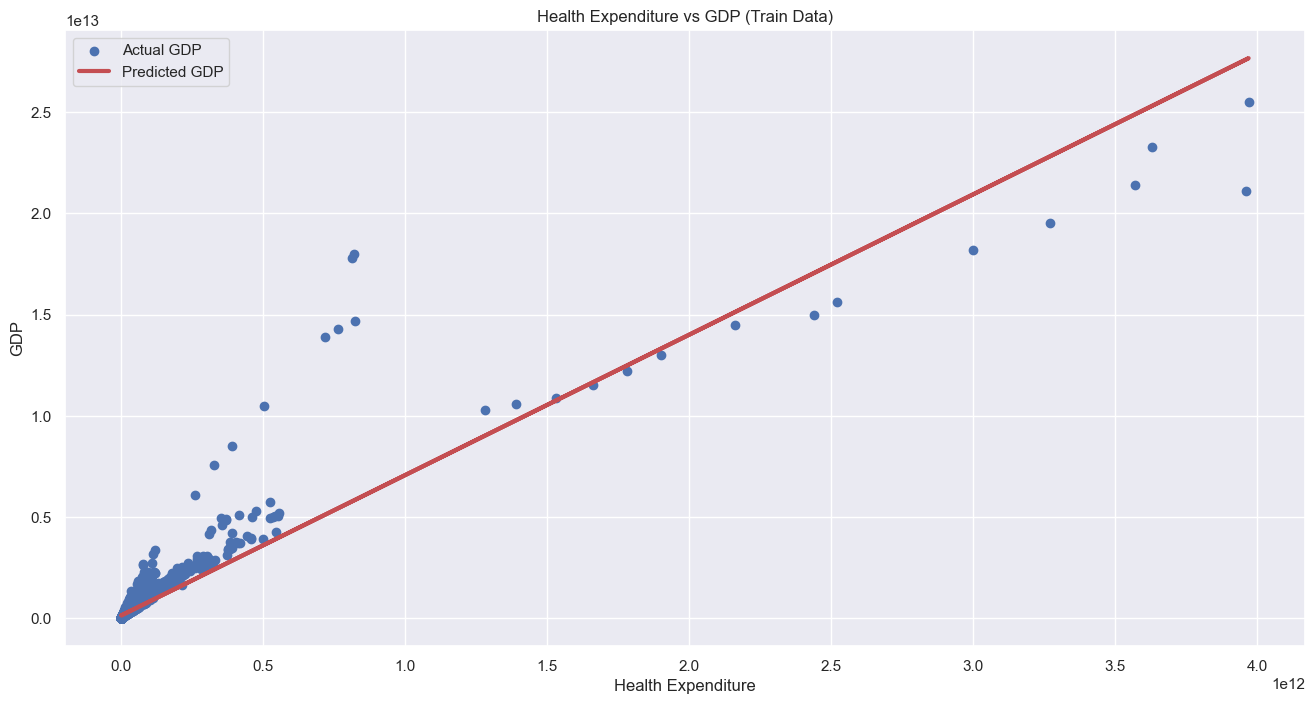

In [180]:
# Coefficients of the Linear Regression line

print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

# Predict Total values corresponding to Health Expenditure Train
regline_x = x_train
regline_y = linreg.predict(x_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_train, y_train, label = 'Actual GDP')
plt.plot(regline_x, regline_y, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Health Expenditure vs GDP (Train Data)')
plt.xlabel('Health Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [181]:
print("Health Expenditure vs GDP (Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data) 
print("Explained Variance (R^2): ", linreg.score(x_train, y_train)) 
 
# Mean Squared Error (MSE) (Train data) 
y_train_pred = linreg.predict(x_train)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_train) - np.min(y_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Health Expenditure vs GDP (Train Data):
------------------------------------

Explained Variance (R^2):  0.8577897507142797
Mean Squared Error (MSE):  3.125038344787837e+23
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.021922525277431236


#### Test Data (Health Expenditure vs GDP)

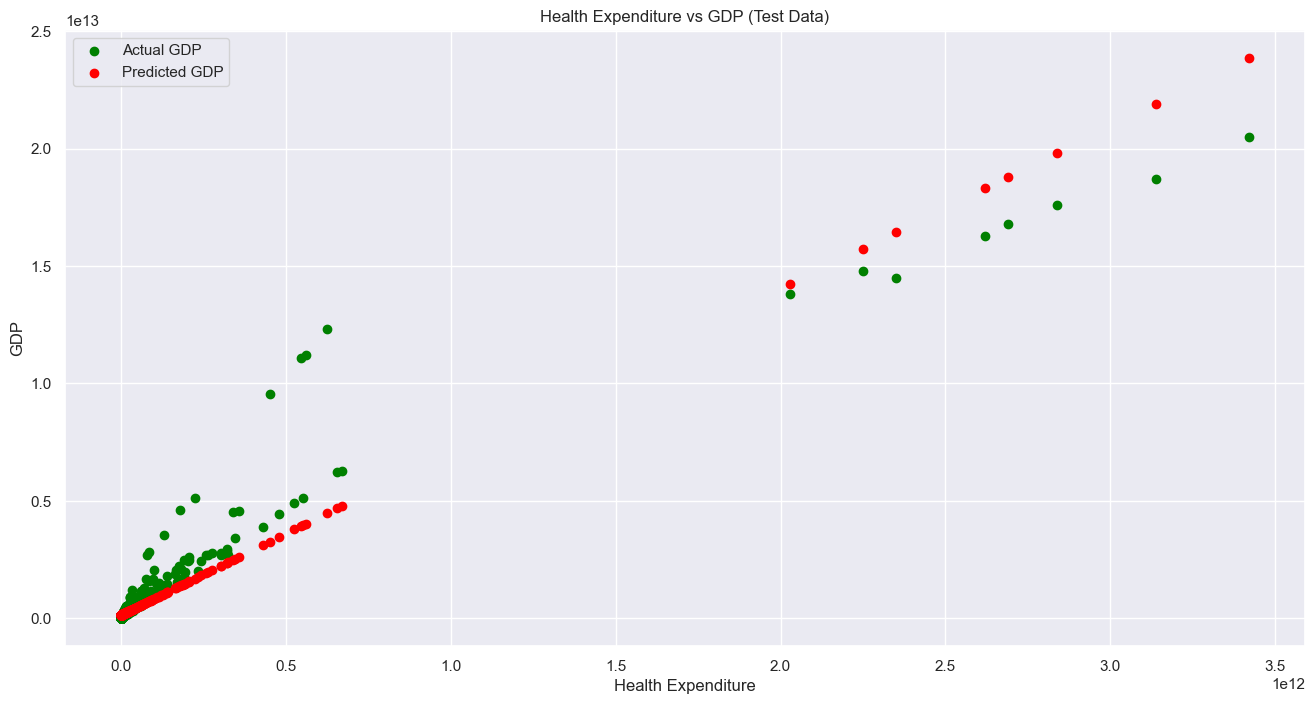

In [182]:
y_test_pred = linreg.predict(x_test)

# Use a scatterplot to show the prdictions
f = plt.figure(figsize=(16,8))  
plt.scatter(x_test, y_test, color = "green", label = 'Actual GDP')  
plt.scatter(x_test, y_test_pred, color = "red", label = 'Predicted GDP')  

# Adding title and labels
plt.title('Health Expenditure vs GDP (Test Data)')
plt.xlabel('Health Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [183]:
print("Health Expenditure vs GDP (Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_test, y_test))

# Mean Squared Error (MSE) (Test data) 
y_test_pred = linreg.predict(x_test)   
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_test) - np.min(y_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Health Expenditure vs GDP (Test Data):
------------------------------------

Explained Variance (R^2):  0.8913455982944084
Mean Squared Error (MSE):  4.246563242463026e+23
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.031788532794925585


#### Removal of outliers

In [184]:
#Removal of outliers
newData = data[['HealthExpenditure', 'GDP']].copy()  

q1 = newData.quantile(0.25)
q3 = newData.quantile(0.75)  
    
outliers = (newData < (q1 - 1.5 * (q3 - 1))) | (newData > (q3 + 1.5 * (q3 - q1)))
outliers.sum()

HealthExpenditure    605
GDP                  498
dtype: int64

In [185]:
outlierCheck = outliers.any(axis = 1)  
outlierCheck.value_counts()

False    3239
True      625
Name: count, dtype: int64

In [186]:
outlierRows = outliers.index[outlierCheck == True]  
outlierRows

Index([ 253,  254,  255,  256,  257,  258,  259,  260,  261,  262,
       ...
       4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4955, 4959],
      dtype='int64', length=625)

In [187]:
# Removing the outliers to clean the data  
newData.drop(axis = 0,
            index = outlierRows,
            inplace = True)

In [188]:
x_clean = pd.DataFrame(newData["HealthExpenditure"])
y_clean = pd.DataFrame(newData["GDP"])  

x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(x_clean, y_clean, test_size = 0.2) #0.2 for 20%.  
  
print("Train Set :", x_clean_train.shape, y_clean_train.shape)
print("Test Set  :", x_clean_test.shape, y_clean_test.shape)

Train Set : (2591, 1) (2591, 1)
Test Set  : (648, 1) (648, 1)


In [189]:
linreg.fit(x_clean_train, y_clean_train)

LinearRegression()

In [190]:
print("Coefficients: a = ", linreg.coef_)
print("Intercept: b = ", linreg.intercept_)

Coefficients: a =  [[15.80237271]]
Intercept: b =  [1.00765892e+10]


#### Clean Train Data (Health Expenditure vs GDP)

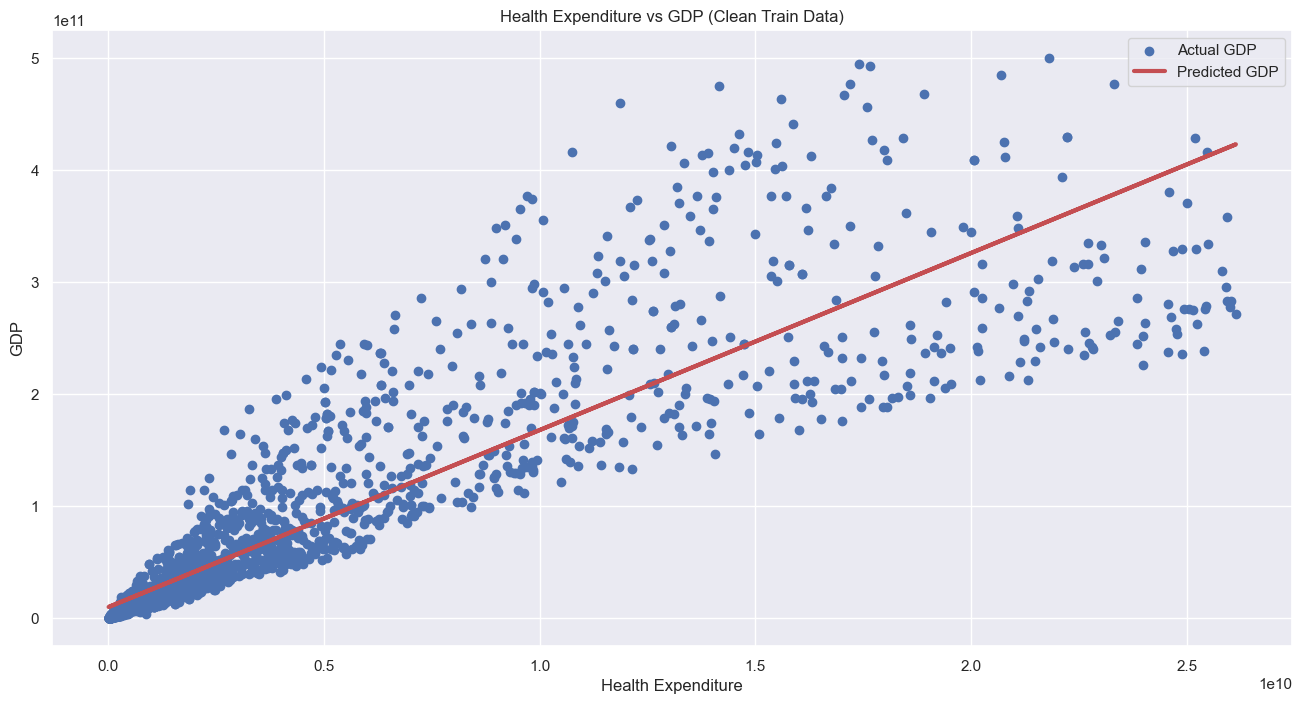

In [191]:
# Plotting the regression line  
regline_x_clean = x_clean_train
regline_y_clean = linreg.predict(x_clean_train)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x_clean_train, y_clean_train, label = 'Actual GDP')
plt.plot(regline_x_clean, regline_y_clean, 'r-', linewidth = 3, label = 'Predicted GDP')

# Adding title and labels
plt.title('Health Expenditure vs GDP (Clean Train Data)')
plt.xlabel('Health Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [192]:
print("Health Expenditure vs GDP (Clean Train Data):\n------------------------------------\n")

# Explained Variance (R^2) (Train data)
print("Explained Variance (R^2): ", linreg.score(x_clean_train, y_clean_train))

# Mean Squared Error (MSE) (Train data)
y_clean_train_pred = linreg.predict(x_clean_train)  
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_train, y_clean_train_pred))

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_clean_train, y_clean_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_train) - np.min(y_clean_train)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_train = rmse_train / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Train data):", nrmse_train)

Health Expenditure vs GDP (Clean Train Data):
------------------------------------

Explained Variance (R^2):  0.8040897192669132
Mean Squared Error (MSE):  1.8290452893884993e+21
Normalized Root Mean Squared Error (NRMSE) (Train data): 0.0855656729419069


#### Clean Test Data (Health Expenditure vs GDP)

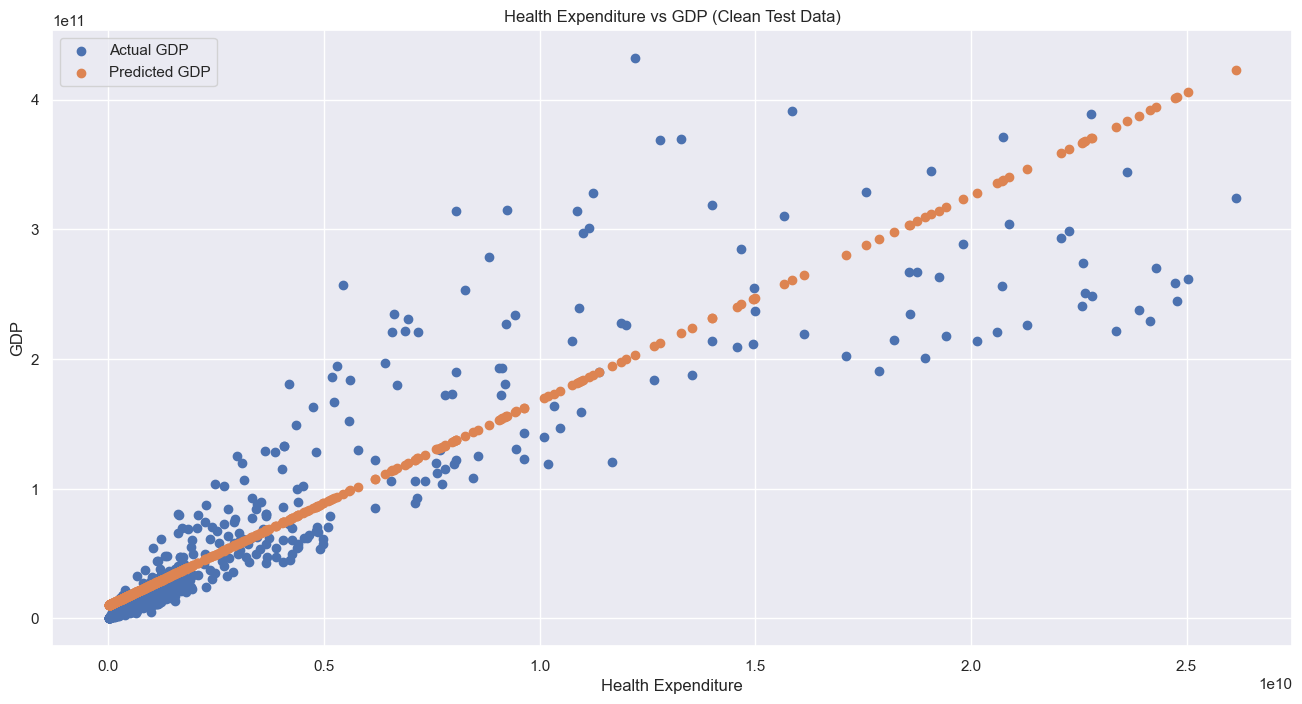

In [193]:
# Goodness of Fit end

y_clean_test_pred = linreg.predict(x_clean_test)

# Use a scatterplot to show the prdictions  
f = plt.figure(figsize=(16,8))  
plt.scatter(x_clean_test, y_clean_test, label = 'Actual GDP')  
plt.scatter(x_clean_test, y_clean_test_pred, label = 'Predicted GDP')

# Adding title and labels
plt.title('Health Expenditure vs GDP (Clean Test Data)')
plt.xlabel('Health Expenditure')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [194]:
print("Health Expenditure vs GDP (Clean Test Data):\n------------------------------------\n")

# Explained Variance (R^2) (Test data)
print("Explained Variance (R^2): ", linreg.score(x_clean_test, y_clean_test))

# Mean Squared Error (MSE) (Test data)
print("Mean Squared Error (MSE): ", mean_squared_error(y_clean_test, y_clean_test_pred))

# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_clean_test, y_clean_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_clean_test) - np.min(y_clean_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)

Health Expenditure vs GDP (Clean Test Data):
------------------------------------

Explained Variance (R^2):  0.7975074392337131
Mean Squared Error (MSE):  1.437415049432123e+21
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.08780905262104956


### Comparing the Values (R^2, MSE, NRMSE) of the Uni-Variate Models (Exports, Imports, Education Expenditure, Health Expenditure)

The MSE for all the models are extremely high.

We decided to investigate why is this the case.

The range of our target variable, which is GDP is significantly larger (from 70 000 to 1.5 x 10^13) than that of the predictor variables. This explains why MSE may not provide an accurate representation of prediction error. 

Hence, by normalizing the MSE, the NRMSE provides a measure of prediction error relative to the scale of the target variable, allowing for fair comparison between models.

NRMSE values tends to be the same for both the train and test sets for all the variables.
However, when comparing the test data sets with and without the outliers, NRMSE values tend to increase. This could be because NRMSE takes into account the range of the GDP values, and since the range of the GDP will change when outliers are removed, NRMSE also changes. 

R^2 Values dropped when outliers were removed. This could be because the outliers that were removed could have contained important information about the GDP that were not captured by the other data points.

---
### Multi Variate Linear Regression Model

In [195]:
x = data[["Export", "Import", "EducationExpenditure", "HealthExpenditure"]]
y = data["GDP"]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(x_train, y_train)




LinearRegression()

Coefficients: [ 1.79296421 -1.02368045  6.04143063  0.560461  ]
Intercept: -20636435794.610474


C:\Users\Darren\AppData\Local\Temp\ipykernel_27868\3646126285.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label = 'Predicted GDP')


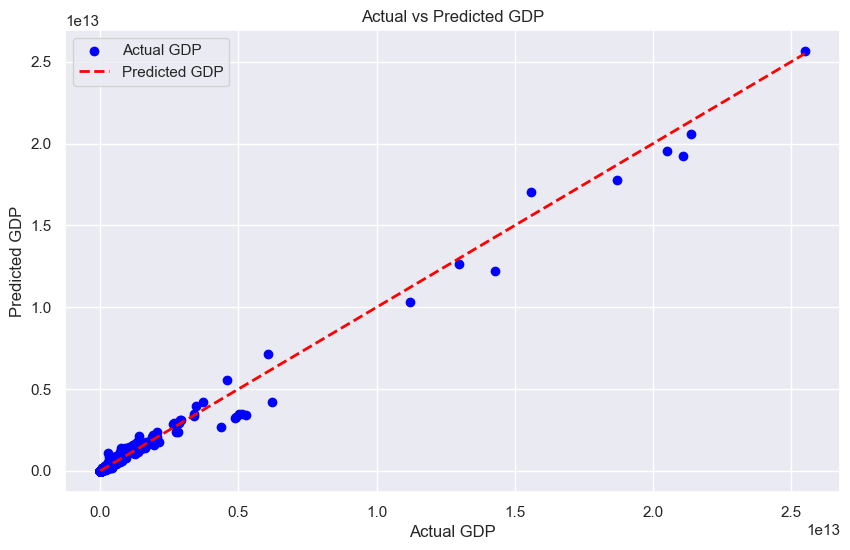

Mean Squared Error (MSE): 5.768047685860054e+22
Normalized Root Mean Squared Error (NRMSE) (Test data): 0.00941840482152144
R-squared (R2) Score: 0.9867059845712988


In [196]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Plot actual vs predicted GDP
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual GDP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label = 'Predicted GDP')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse)

# Calculate the range of the target variable (GDP)
gdp_range = np.max(y_test) - np.min(y_test)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse_test = rmse_test / gdp_range

print("Normalized Root Mean Squared Error (NRMSE) (Test data):", nrmse_test)


# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

### Comparing the Values (R^2, MSE, NRMSE) of Multi-Variate Regression Model with the Uni-Variate Models

R-squared (R^2) for our multi-variate linear regression model is significantly high as compared to our uni-variate regression models, where we considered each variable seperately. We believe this is because we have incorporated multiple variables simultaneously to predict GDP, allowing the model to capture the combined effects of all predictors on the outcome variable. The multi-variate model takes into account the dependencies among the variables, leading to a better fit to the data and a higher R-squared value.

As for NRMSE, the multivariate model reduces the variability in prediction errors by capturing more of the underlying patterns and relationships in the data, leading to a lower NRMSE value. 


## 5. Random Forest Model

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [198]:
RFdata = data.drop(columns=['CountryName','Year'])

RFdata

,EaseofDoingBusiness,GDP,InflationRate,Unemployment,Population,Land,Export,Import,EducationExpenditure,HealthExpenditure,NetTrade,GDPPerCapita,PopulationDensity
23,64.763660,3.480355e+09,0.050018,19.028,3089027,28750.0,7.000834e+08,1.508344e+09,3.528046e+08,2.068788e+08,-8.082604e+08,1126.683340,107.444417
24,64.763660,3.922101e+09,3.107588,18.575,3060173,28750.0,8.367179e+08,1.771127e+09,4.150340e+08,2.324171e+08,-9.344092e+08,1281.659826,106.440800
25,64.763660,4.348068e+09,7.770526,17.895,3051010,28750.0,9.107297e+08,2.068787e+09,4.298900e+08,2.463007e+08,-1.158057e+09,1425.124219,106.122087
26,64.763660,5.611496e+09,0.484003,16.989,3039616,28750.0,1.169850e+09,2.591006e+09,5.933372e+08,3.478521e+08,-1.421156e+09,1846.120121,105.725774
27,64.763660,7.184686e+09,2.280019,16.310,3026939,28750.0,1.596262e+09,3.220868e+09,7.689884e+08,4.350887e+08,-1.624606e+09,2373.581292,105.284835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,50.509980,3.415607e+10,10.618866,6.784,15052184,390760.0,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
5102,54.469350,2.183223e+10,255.304991,7.370,15354608,390760.0,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
5103,49.833418,2.150970e+10,557.201817,7.898,15669666,390760.0,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486
5104,49.833418,2.837124e+10,98.546105,8.067,15993524,390760.0,7.209542e+09,8.767063e+09,6.479419e+09,1.902265e+09,-1.557521e+09,1773.920411,40.929276


Mean Squared Error: 6.200902571868103e+22
Normalized Root Mean Squared Error (NRMSE): 0.00976540784891756
R-squared: 0.9857083542037333
            Actual     Predicted
2858  1.575200e+09  1.494809e+09
2401  1.370000e+11  1.358422e+11
3281  7.660000e+11  7.701500e+11
2088  1.610000e+11  1.658800e+11
1228  2.104645e+10  2.206745e+10
...            ...           ...
4021  4.076579e+09  6.323704e+09
2522  1.150000e+11  1.112369e+11
1494  3.810081e+10  3.819908e+10
4394  2.420000e+11  2.380100e+11
2116  4.680000e+11  4.790300e+11

[773 rows x 2 columns]


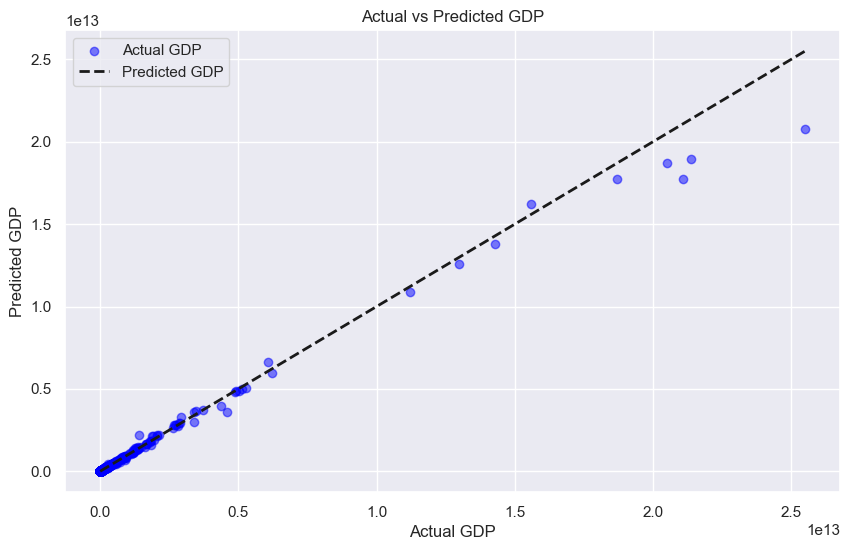

Correlation between Actual and Predicted GDP: 0.9963445535595035


In [199]:
X = RFdata.drop(columns=['GDP'])
y = RFdata["GDP"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate RMSE 
rmse = np.sqrt(mse) 
 
# Calculate the range of the target variable 
y_range = y_test.max() - y_test.min() 
 
# Calculate NRMSE 
nrmse = rmse / y_range 
 
# Print NRMSE 
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Print predicted and actual results
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results_df)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label = 'Actual GDP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label = 'Predicted GDP')  # Diagonal line
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.show()

# Calculate correlation between actual and predicted GDP
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Correlation between Actual and Predicted GDP:", correlation)

Our model has a extremely high linear correlation between actual and predicted GDP, indicating a strong positive linear relationship between the two.

This means our model's predictions align closly with the actual values, showing reliability and accuracy in our model.

Cross-Validation Scores: [0.88026137 0.91979825 0.81200989 0.9399863  0.88180771]
Mean Cross-Validation Score: 0.8867727025118711


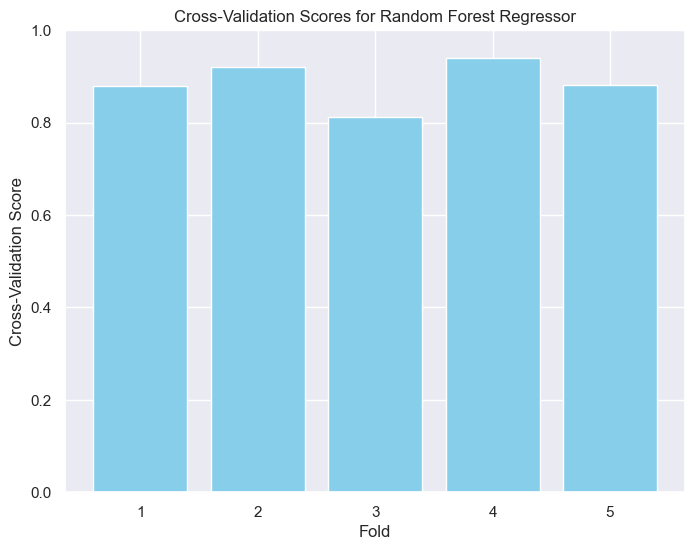

In [200]:
# Perform cross-validation 
cv_scores = cross_val_score(rf_model, X, y, cv=5) 
print("Cross-Validation Scores:", cv_scores) 
print("Mean Cross-Validation Score:", np.mean(cv_scores)) 
 
# Plot cross-validation scores 
plt.figure(figsize=(8, 6)) 
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue') 
plt.xlabel('Fold') 
plt.ylabel('Cross-Validation Score') 
plt.title('Cross-Validation Scores for Random Forest Regressor') 
plt.xticks(range(1, len(cv_scores) + 1)) 
plt.ylim(0, 1)  # Adjust ylim if needed 
plt.show()

We have a high mean-cross validation score, indicating that our model performs well on unseen data and is likely capturing the underlying patterns in the data effectively.

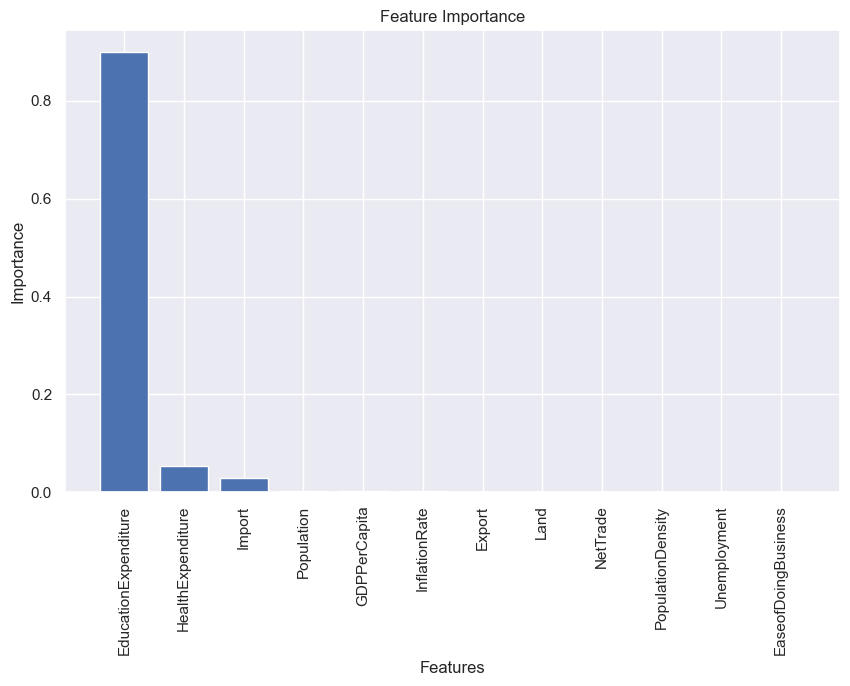

In [201]:
# Get feature importances 
importances = rf_model.feature_importances_ 
 
# Sort feature importances in descending order 
indices = np.argsort(importances)[::-1] 
 
# Rearrange feature names based on importance ranking 
feature_names = X.columns[indices] 
 
# Plot 
plt.figure(figsize=(10, 6)) 
plt.title("Feature Importance") 
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), feature_names, rotation=90) 
plt.xlabel("Features") 
plt.ylabel("Importance") 
plt.show()

Education Expenditure, Health Expenditure and Imports have the highest feature importance in our Random Forest Model, meaning these variables are the most informative in predicting GDP.

## 6. Long Short-Term Memory (LSTM) Model

Our dataset is a time series of GDP along with it's predictor variables. By modelling our time series dataset through a LSTM Model, we hope to capture the complex relationships present in the data and build an accurate model.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

#### 6.1 LSTM Data Preparation

In [203]:
data = pd.read_csv('countries.csv', index_col='Year', parse_dates=True)

data = data.drop(columns=['CountryName','Agriculture(%GDP)', 'EducationExpenditure(%GDP)',
                        'Export(%GDP)', 'HealthExpenditure(%GDP)', 'Industry(%GDP)',
                        'R&D', 'ContinentName', 'CountryCode', 'Import(%GDP)', 'Service(%GDP)'])

data = data.dropna()
data

,EaseofDoingBusiness,GDP,InflationRate,Unemployment,Population,Land,Export,Import,EducationExpenditure,HealthExpenditure,NetTrade,GDPPerCapita,PopulationDensity
Year,,,,,,,,,,,,,
2000-01-01,64.763660,3.480355e+09,0.050018,19.028,3089027,28750.0,7.000834e+08,1.508344e+09,3.528046e+08,2.068788e+08,-8.082604e+08,1126.683340,107.444417
2001-01-01,64.763660,3.922101e+09,3.107588,18.575,3060173,28750.0,8.367179e+08,1.771127e+09,4.150340e+08,2.324171e+08,-9.344092e+08,1281.659826,106.440800
2002-01-01,64.763660,4.348068e+09,7.770526,17.895,3051010,28750.0,9.107297e+08,2.068787e+09,4.298900e+08,2.463007e+08,-1.158057e+09,1425.124219,106.122087
2003-01-01,64.763660,5.611496e+09,0.484003,16.989,3039616,28750.0,1.169850e+09,2.591006e+09,5.933372e+08,3.478521e+08,-1.421156e+09,1846.120121,105.725774
2004-01-01,64.763660,7.184686e+09,2.280019,16.310,3026939,28750.0,1.596262e+09,3.220868e+09,7.689884e+08,4.350887e+08,-1.624606e+09,2373.581292,105.284835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,50.509980,3.415607e+10,10.618866,6.784,15052184,390760.0,8.936585e+09,9.695644e+09,6.503261e+09,1.595231e+09,-7.590586e+08,2269.177012,38.520278
2019-01-01,54.469350,2.183223e+10,255.304991,7.370,15354608,390760.0,5.930390e+09,5.572484e+09,4.986042e+09,7.990086e+08,3.579063e+08,1421.868596,39.294216
2020-01-01,49.833418,2.150970e+10,557.201817,7.898,15669666,390760.0,5.574672e+09,6.180499e+09,3.369841e+09,7.368322e+08,-6.058277e+08,1372.696674,40.100486


We have structured our model such that it predicts the GDP of the subsequent year based on the GDP and other variables from the preceding three years. 

We have organised input-output pairs where the input consists of GDP and other variables over the past three years, and the output is the GDP of the subsequent year.

We have also normalised our input variables such that each feature has a similar scale and distribution.

In [204]:
from sklearn.preprocessing import MinMaxScaler

input_features = data.columns.tolist()

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Define the number of time steps (3 year's data to predict current year GDP)
n_steps = 3 

# Convert to supervised learning format
X, y = [], []
for i in range(len(data_normalized) - n_steps):
    X.append(data_normalized[i:i+n_steps, :])
    y.append(data_normalized[i+n_steps, input_features.index('GDP')])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3088, 3, 13)
y_train shape: (3088,)
X_test shape: (773, 3, 13)
y_test shape: (773,)


Our input consists of three dimensions:
    
The first dimension (3088 for training, 773 for testing) represents the number  data points in each set.

The second dimension (3) is the time steps for each sample. In this case, we are using the past 3 years' data to predict the current years' GDP.

The third dimension (13) is the number of predictors for each time step.

Our output would be the GDP value.

Epoch 1/100


c:\Users\Darren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6582e-04 - val_loss: 0.0024
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4028e-04 - val_loss: 0.0028
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2586e-04 - val_loss: 0.0019
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3980e-04 - val_loss: 0.0018
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1468e-04 - val_loss: 0.0024
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6135e-04 - val_loss: 0.0025
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1378e-04 - val_loss: 0.0019
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8495e-04 - val_loss: 0.0020
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6227e-04 - val_loss: 0.0015
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4294e-04 - val_loss: 0.0018
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━

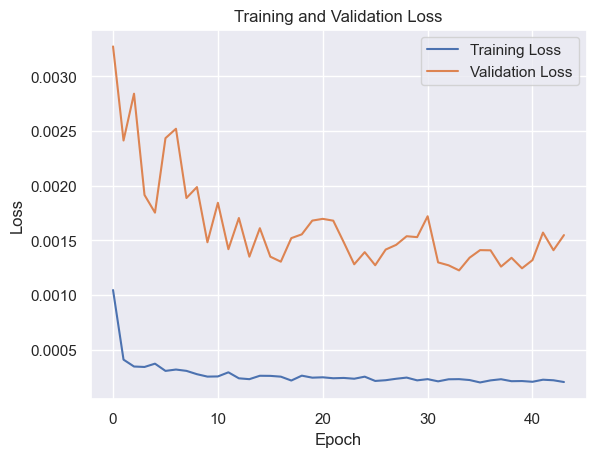

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Extract loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss for training and validation data
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Our test loss is 0.00108, indicating that on average, the model's predictions are off by approximately 0.00108 units from the actual values in the test dataset. Our test loss is low, indicating that our model is accurate at making future GDP predictions.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error (MSE): 0.0012262785917512777
Mean Absolute Error (MAE): 0.006488182060256357
R-squared (R2): 0.9029563959238983
Normalized Root Mean Squared Error (NRMSE): 0.03501826083276093


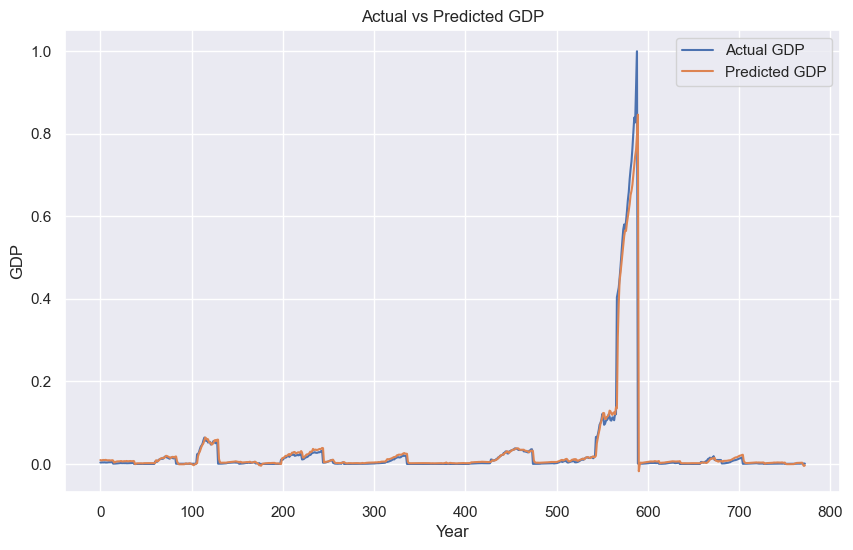

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Reshape y_pred and y_test to ensure they have shape (828, 1)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Calculate and print some evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
gdp_range = np.max(y_test) - np.min(y_test)
nrmse = rmse / gdp_range


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)


# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual GDP')
plt.plot(y_pred, label='Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

Our MSE and MAE values are significantly low, indicating that our model is accurate at predicting GDP values.
We also have a high R^2 score.
We believe that our model is accurate at predicting GDP values over time.

## 7. Data Insights

### 7.1 Predictive Performance Comparison

Linear Regression:

1. Mean Squared Error (MSE): 5.768047685860054e+22

2. Normalized Root Mean Squared Error (NRMSE) (Test data): 0.00941840482152144

3. R-squared (R2) Score: 0.9867059845712988


Random Forest:

1. Mean Squared Error: 6.200902571868103e+22

2. Normalized Root Mean Squared Error (NRMSE): 0.00976540784891756

3. R-squared: 0.9857083542037333


LSTM:

1. Mean Squared Error (MSE): 0.0012262785917512777

2. R-squared (R2): 0.9029563959238983

3. Normalized Root Mean Squared Error (NRMSE): 0.03501826083276093



Observation: Extremely high MSE values for Linear Regression and Random Forest Models but low NRMSE values. 

Insights: Despite removing the outliers, high MSE values still persists for our linear regression and random forest models. We decided to investigate why is this the case.

The range of our target variable, which is GDP is significantly larger (70000 to 1.5 x 10^13) than that of the predictor variables. This explains why MSE may not provide an accurate representation of prediction error. 

Hence, we took the NRMSE value, which is the square root of the MSE value divided by the range of the GDP. We can see that NRMSE is low now. By dividing the MSE by the range of GDP and taking the square root, we have normalized the error measure with respect to the scale of the GDP. This normalization makes the error metric more comparable across other variables which have different scales of data.

The same observation is not seen in our LSTM model as our LSTM model as all our datapoints were scaled before our model was built. This automatically takes into account the scalability of the different variables.
        


### 7.2 Linear and Non-Linear Relationships

Variables such as Exports have a high correlation with GDP and performs well when linear regression is done, but when we look at our Random Forest Model, it is not one of the variables with the highest feature importance.
This could be because Random Forest considers both linear and non-linear relationships and thus, it is important to consider both linear and non-linear relationships when predicting GDP.

LSTM and Random Forest Model could be better predictors in this regard as they take into account complex relationships between GDP and its variables.

### 7.3 LSTM and Seasonal Trends

LSTM Model has high predictive power as shown by the low MSE. Furthermore, we believe that LSTM could be a better predictor compared to the other 2 models as it takes into account the time series dynamics of GDP and its variables. 

For example, with reference to our problem statement, LSTM models can provide policy makers with more accurate forecasts into the impact of GDP due to the different indicators. Policy makers can incorporate time series analysis into their policy formation and make more informed decisions when responding to changing market conditions. 


## 8. Conclusion

Linear Regression models are simple but may not capture complex nonlinear relationships in the data. Random Forest models are more flexible and can capture nonlinear relationships but may require more computational resources, especially for large datasets. LSTM models are also flexible and can capture relationships in time series data but they also require more computational resources.

Furthermore, when we consider intepretability, linear regression models provide coefficients that directly indicate the relationship between predictor variables and the target variable.
Random Forest models offer insights into feature importance but are less interpretable compared to Linear Regression. 
LSTM models are more complex and less interpretable due to their complex architecture.

With respect to our problem statement, it is crucial that policy makers consider the complexity and intepretability of these various models before introducing them into their decision making. 

If policymakers prioritize simplicity and interpretability, linear Regression may be the preferred.
If capturing nonlinear relationships and gaining insights into feature importance is important, Random Forest could be more suitable. 

If policymakers aim to model the complex temporal dynamics of GDP, LSTM may offer the most comprehensive approach, although in this case, the trade off would be intepretability.